In [20]:
import numpy as np

In [21]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [55]:
# 금리
fedfunds_trin_o = pd.read_csv('FEDFUNDS.csv')
fedfunds_trin_o.head(1)
fedfunds_trin_o = fedfunds_trin_o.drop(['DATE'], axis=1)
fedfunds_trin = fedfunds_trin_o.drop((342), axis=0)

fedfunds_trin_o.shape, fedfunds_trin.shape

((343, 1), (342, 1))

In [56]:
# 재고율
isratio_trin_o = pd.read_csv('ISRATIO.csv')
isratio_trin_o.head(1)
isratio_trin_o = isratio_trin_o.drop(['DATE'], axis=1)
isratio_trin = isratio_trin_o.drop((342), axis=0)

isratio_trin_o.shape, isratio_trin.shape

((343, 1), (342, 1))

In [57]:
# 광의통화 
m2_trin_o = pd.read_csv('M2.csv')
m2_trin_o.head(1)
m2_trin_o = m2_trin_o.drop(['DATE'], axis=1)
m2_trin = m2_trin_o.drop((342), axis=0)

m2_trin_o.shape, m2_trin.shape

((343, 1), (342, 1))

In [58]:
# 실업율
unrate_trin_o = pd.read_csv('UNRATE.csv')
unrate_trin_o.head(1)
unrate_trin_o = unrate_trin_o.drop(['DATE'], axis=1)
unrate_trin = unrate_trin_o.drop((342), axis=0)

unrate_trin_o.shape, unrate_trin.shape

((343, 1), (342, 1))

In [137]:
# S&P 500
sp500_trin_o = pd.read_csv('SP500.csv')
sp500_trin_o.head(1)

sp500_date_o = sp500_trin_o.drop(['Open','Low', 'High','Close','Adj Close','Volume'], axis=1)

sp500_adjclose_trin_o = sp500_trin_o.drop(['Date','Open','Low','High','Close','Volume'], axis=1)

sp500_high_trin_o = sp500_trin_o.drop(['Date','Open','Low','Close','Adj Close','Volume'], axis=1)
sp500_high_trin = sp500_high_trin_o.drop((342), axis=0)

sp500_low_trin_o = sp500_trin_o.drop(['Date','Open','High','Close','Adj Close','Volume'], axis=1)
sp500_low_trin = sp500_low_trin_o.drop((342), axis=0)

sp500_high_trin_o.shape, sp500_high_trin.shape, sp500_low_trin_o.shape, sp500_low_trin.shape

((343, 1), (342, 1), (343, 1), (342, 1))

In [61]:
x_train = np.concatenate((fedfunds_trin, isratio_trin, m2_trin, unrate_trin), axis=1)
y_train = np.concatenate((sp500_high_trin, sp500_low_trin), axis=1)

In [211]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=52, activation='relu', input_shape=(4,)),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(units=39, activation='relu'),
    tf.keras.layers.Dense(units=26, activation='relu'),
    tf.keras.layers.Dense(units = 2)
])

In [212]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.00015), loss='mse')

In [213]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_56 (Dense)             (None, 52)                260       
_________________________________________________________________
dropout_14 (Dropout)         (None, 52)                0         
_________________________________________________________________
dense_57 (Dense)             (None, 39)                2067      
_________________________________________________________________
dense_58 (Dense)             (None, 26)                1040      
_________________________________________________________________
dense_59 (Dense)             (None, 2)                 54        
Total params: 3,421
Trainable params: 3,421
Non-trainable params: 0
_________________________________________________________________


In [215]:
history = model.fit(x_train, y_train, epochs = 10000, batch_size=200)

Train on 342 samples
Epoch 1/10000
342/342 [==============================] - 0s 26us/sample - loss: 24537.8377
Epoch 2/10000
342/342 [==============================] - 0s 26us/sample - loss: 25595.6916
Epoch 3/10000
342/342 [==============================] - 0s 38us/sample - loss: 25659.3340
Epoch 4/10000
342/342 [==============================] - 0s 12us/sample - loss: 24934.3393
Epoch 5/10000
342/342 [==============================] - 0s 15us/sample - loss: 23978.9595
Epoch 6/10000
342/342 [==============================] - 0s 15us/sample - loss: 25720.1812
Epoch 7/10000
342/342 [==============================] - 0s 12us/sample - loss: 25512.7741
Epoch 8/10000
342/342 [==============================] - 0s 23us/sample - loss: 26773.8155
Epoch 9/10000
342/342 [==============================] - 0s 15us/sample - loss: 26158.9714
Epoch 10/10000
342/342 [==============================] - 0s 17us/sample - loss: 24216.3943
Epoch 11/10000
342/342 [==============================] - 0s 15us/sa

342/342 [==============================] - 0s 32us/sample - loss: 26915.4183
Epoch 90/10000
342/342 [==============================] - 0s 15us/sample - loss: 25350.1292
Epoch 91/10000
342/342 [==============================] - 0s 29us/sample - loss: 25556.8283
Epoch 92/10000
342/342 [==============================] - 0s 12us/sample - loss: 25127.6985
Epoch 93/10000
342/342 [==============================] - 0s 17us/sample - loss: 25229.5683
Epoch 94/10000
342/342 [==============================] - 0s 12us/sample - loss: 26942.5277
Epoch 95/10000
342/342 [==============================] - 0s 23us/sample - loss: 27074.6361
Epoch 96/10000
342/342 [==============================] - 0s 15us/sample - loss: 27344.8587
Epoch 97/10000
342/342 [==============================] - 0s 35us/sample - loss: 24985.7478
Epoch 98/10000
342/342 [==============================] - 0s 15us/sample - loss: 26823.5416
Epoch 99/10000
342/342 [==============================] - 0s 35us/sample - loss: 26206.4968
Epo

342/342 [==============================] - 0s 12us/sample - loss: 26650.7062
Epoch 178/10000
342/342 [==============================] - 0s 22us/sample - loss: 25218.9948
Epoch 179/10000
342/342 [==============================] - 0s 12us/sample - loss: 27054.0962
Epoch 180/10000
342/342 [==============================] - 0s 15us/sample - loss: 23426.0797
Epoch 181/10000
342/342 [==============================] - 0s 15us/sample - loss: 27273.1486
Epoch 182/10000
342/342 [==============================] - 0s 12us/sample - loss: 25210.7902
Epoch 183/10000
342/342 [==============================] - 0s 20us/sample - loss: 24089.6404
Epoch 184/10000
342/342 [==============================] - 0s 12us/sample - loss: 25462.2273
Epoch 185/10000
342/342 [==============================] - 0s 12us/sample - loss: 27726.1257
Epoch 186/10000
342/342 [==============================] - 0s 23us/sample - loss: 25470.4301
Epoch 187/10000
342/342 [==============================] - 0s 12us/sample - loss: 2647

Epoch 265/10000
342/342 [==============================] - 0s 35us/sample - loss: 26928.3910
Epoch 266/10000
342/342 [==============================] - 0s 15us/sample - loss: 24824.9556
Epoch 267/10000
342/342 [==============================] - 0s 38us/sample - loss: 27454.3637
Epoch 268/10000
342/342 [==============================] - 0s 17us/sample - loss: 24483.3952
Epoch 269/10000
342/342 [==============================] - 0s 12us/sample - loss: 25839.2389
Epoch 270/10000
342/342 [==============================] - 0s 15us/sample - loss: 25400.8989
Epoch 271/10000
342/342 [==============================] - 0s 12us/sample - loss: 26477.2379
Epoch 272/10000
342/342 [==============================] - 0s 23us/sample - loss: 23445.0312
Epoch 273/10000
342/342 [==============================] - 0s 17us/sample - loss: 25592.4861
Epoch 274/10000
342/342 [==============================] - 0s 17us/sample - loss: 26172.9112
Epoch 275/10000
342/342 [==============================] - 0s 15us/sam

342/342 [==============================] - 0s 26us/sample - loss: 25273.3787
Epoch 353/10000
342/342 [==============================] - 0s 12us/sample - loss: 27988.6336
Epoch 354/10000
342/342 [==============================] - 0s 14us/sample - loss: 26336.5465
Epoch 355/10000
342/342 [==============================] - 0s 23us/sample - loss: 25543.0433
Epoch 356/10000
342/342 [==============================] - 0s 12us/sample - loss: 25577.9085
Epoch 357/10000
342/342 [==============================] - 0s 23us/sample - loss: 23485.1505
Epoch 358/10000
342/342 [==============================] - 0s 12us/sample - loss: 24482.5135
Epoch 359/10000
342/342 [==============================] - 0s 15us/sample - loss: 24021.4407
Epoch 360/10000
342/342 [==============================] - 0s 12us/sample - loss: 26434.3004
Epoch 361/10000
342/342 [==============================] - 0s 12us/sample - loss: 27359.7098
Epoch 362/10000
342/342 [==============================] - 0s 23us/sample - loss: 2351

342/342 [==============================] - 0s 20us/sample - loss: 25012.4547
Epoch 441/10000
342/342 [==============================] - 0s 12us/sample - loss: 26162.0927
Epoch 442/10000
342/342 [==============================] - 0s 12us/sample - loss: 25401.9485
Epoch 443/10000
342/342 [==============================] - 0s 17us/sample - loss: 25355.4561
Epoch 444/10000
342/342 [==============================] - 0s 12us/sample - loss: 25890.0416
Epoch 445/10000
342/342 [==============================] - 0s 23us/sample - loss: 27755.2488
Epoch 446/10000
342/342 [==============================] - 0s 12us/sample - loss: 25290.1342
Epoch 447/10000
342/342 [==============================] - 0s 12us/sample - loss: 28366.2615
Epoch 448/10000
342/342 [==============================] - 0s 23us/sample - loss: 25697.5850
Epoch 449/10000
342/342 [==============================] - 0s 15us/sample - loss: 27599.2813
Epoch 450/10000
342/342 [==============================] - 0s 20us/sample - loss: 2594

342/342 [==============================] - 0s 15us/sample - loss: 24380.5323
Epoch 529/10000
342/342 [==============================] - 0s 20us/sample - loss: 25313.4752
Epoch 530/10000
342/342 [==============================] - 0s 35us/sample - loss: 27237.1778
Epoch 531/10000
342/342 [==============================] - ETA: 0s - loss: 27113.470 - 0s 47us/sample - loss: 25667.5439
Epoch 532/10000
342/342 [==============================] - 0s 20us/sample - loss: 26942.0612
Epoch 533/10000
342/342 [==============================] - 0s 26us/sample - loss: 27424.6242
Epoch 534/10000
342/342 [==============================] - 0s 15us/sample - loss: 26973.5722
Epoch 535/10000
342/342 [==============================] - 0s 32us/sample - loss: 24546.2996
Epoch 536/10000
342/342 [==============================] - 0s 15us/sample - loss: 27899.2029
Epoch 537/10000
342/342 [==============================] - 0s 32us/sample - loss: 27554.1343
Epoch 538/10000
342/342 [==============================] -

Epoch 616/10000
342/342 [==============================] - 0s 17us/sample - loss: 26963.6055
Epoch 617/10000
342/342 [==============================] - 0s 15us/sample - loss: 27512.3279
Epoch 618/10000
342/342 [==============================] - 0s 105us/sample - loss: 24679.0095
Epoch 619/10000
342/342 [==============================] - 0s 26us/sample - loss: 26244.3668
Epoch 620/10000
342/342 [==============================] - 0s 15us/sample - loss: 25077.0318
Epoch 621/10000
342/342 [==============================] - 0s 20us/sample - loss: 25418.8112
Epoch 622/10000
342/342 [==============================] - 0s 15us/sample - loss: 25272.9733
Epoch 623/10000
342/342 [==============================] - 0s 26us/sample - loss: 28217.0586
Epoch 624/10000
342/342 [==============================] - 0s 17us/sample - loss: 26890.0494
Epoch 625/10000
342/342 [==============================] - 0s 15us/sample - loss: 24083.3649
Epoch 626/10000
342/342 [==============================] - 0s 20us/sa

342/342 [==============================] - 0s 20us/sample - loss: 24993.2311
Epoch 704/10000
342/342 [==============================] - 0s 12us/sample - loss: 29425.6462
Epoch 705/10000
342/342 [==============================] - 0s 15us/sample - loss: 24657.4666
Epoch 706/10000
342/342 [==============================] - 0s 15us/sample - loss: 26984.1815
Epoch 707/10000
342/342 [==============================] - 0s 9us/sample - loss: 26559.7346
Epoch 708/10000
342/342 [==============================] - 0s 20us/sample - loss: 26611.5813
Epoch 709/10000
342/342 [==============================] - 0s 12us/sample - loss: 25844.7880
Epoch 710/10000
342/342 [==============================] - 0s 15us/sample - loss: 26825.9546
Epoch 711/10000
342/342 [==============================] - 0s 26us/sample - loss: 25374.8785
Epoch 712/10000
342/342 [==============================] - 0s 28us/sample - loss: 26685.5429
Epoch 713/10000
342/342 [==============================] - 0s 26us/sample - loss: 25684

342/342 [==============================] - 0s 23us/sample - loss: 24708.2666
Epoch 792/10000
342/342 [==============================] - 0s 12us/sample - loss: 26723.1440
Epoch 793/10000
342/342 [==============================] - 0s 15us/sample - loss: 25507.7063
Epoch 794/10000
342/342 [==============================] - 0s 12us/sample - loss: 25135.9610
Epoch 795/10000
342/342 [==============================] - 0s 20us/sample - loss: 25762.7801
Epoch 796/10000
342/342 [==============================] - 0s 15us/sample - loss: 25553.9196
Epoch 797/10000
342/342 [==============================] - 0s 15us/sample - loss: 24623.9420
Epoch 798/10000
342/342 [==============================] - 0s 23us/sample - loss: 23741.7339
Epoch 799/10000
342/342 [==============================] - 0s 12us/sample - loss: 22411.1696
Epoch 800/10000
342/342 [==============================] - 0s 26us/sample - loss: 26285.8022
Epoch 801/10000
342/342 [==============================] - 0s 12us/sample - loss: 2658

342/342 [==============================] - 0s 20us/sample - loss: 27036.9682
Epoch 879/10000
342/342 [==============================] - 0s 15us/sample - loss: 25524.6667
Epoch 880/10000
342/342 [==============================] - 0s 12us/sample - loss: 24460.3438
Epoch 881/10000
342/342 [==============================] - 0s 20us/sample - loss: 24625.4498
Epoch 882/10000
342/342 [==============================] - 0s 12us/sample - loss: 27403.7270
Epoch 883/10000
342/342 [==============================] - 0s 9us/sample - loss: 24906.7321
Epoch 884/10000
342/342 [==============================] - 0s 15us/sample - loss: 24927.2716
Epoch 885/10000
342/342 [==============================] - 0s 12us/sample - loss: 26120.4982
Epoch 886/10000
342/342 [==============================] - 0s 35us/sample - loss: 26938.5691
Epoch 887/10000
342/342 [==============================] - 0s 15us/sample - loss: 23110.7367
Epoch 888/10000
342/342 [==============================] - 0s 35us/sample - loss: 27179

342/342 [==============================] - 0s 15us/sample - loss: 27472.2799
Epoch 967/10000
342/342 [==============================] - 0s 15us/sample - loss: 25485.5972
Epoch 968/10000
342/342 [==============================] - 0s 18us/sample - loss: 27524.6901
Epoch 969/10000
342/342 [==============================] - 0s 12us/sample - loss: 24276.4237
Epoch 970/10000
342/342 [==============================] - 0s 20us/sample - loss: 26482.0407
Epoch 971/10000
342/342 [==============================] - 0s 15us/sample - loss: 28682.4752
Epoch 972/10000
342/342 [==============================] - 0s 12us/sample - loss: 25051.8945
Epoch 973/10000
342/342 [==============================] - 0s 15us/sample - loss: 27206.2759
Epoch 974/10000
342/342 [==============================] - 0s 12us/sample - loss: 27277.8920
Epoch 975/10000
342/342 [==============================] - 0s 29us/sample - loss: 25291.0932
Epoch 976/10000
342/342 [==============================] - 0s 12us/sample - loss: 2421

342/342 [==============================] - 0s 15us/sample - loss: 25525.0561
Epoch 1054/10000
342/342 [==============================] - 0s 17us/sample - loss: 24391.1123
Epoch 1055/10000
342/342 [==============================] - 0s 23us/sample - loss: 26333.1557
Epoch 1056/10000
342/342 [==============================] - 0s 17us/sample - loss: 25889.3855
Epoch 1057/10000
342/342 [==============================] - 0s 20us/sample - loss: 25945.1135
Epoch 1058/10000
342/342 [==============================] - 0s 17us/sample - loss: 23261.6887
Epoch 1059/10000
342/342 [==============================] - 0s 15us/sample - loss: 25932.2938
Epoch 1060/10000
342/342 [==============================] - 0s 23us/sample - loss: 25208.3094
Epoch 1061/10000
342/342 [==============================] - 0s 15us/sample - loss: 25269.6038
Epoch 1062/10000
342/342 [==============================] - 0s 17us/sample - loss: 25001.0682
Epoch 1063/10000
342/342 [==============================] - 0s 26us/sample - 

342/342 [==============================] - 0s 23us/sample - loss: 27719.6095
Epoch 1141/10000
342/342 [==============================] - 0s 15us/sample - loss: 27045.0618
Epoch 1142/10000
342/342 [==============================] - 0s 26us/sample - loss: 25391.4591
Epoch 1143/10000
342/342 [==============================] - 0s 12us/sample - loss: 24671.7358
Epoch 1144/10000
342/342 [==============================] - 0s 23us/sample - loss: 26664.2774
Epoch 1145/10000
342/342 [==============================] - 0s 12us/sample - loss: 25146.0272
Epoch 1146/10000
342/342 [==============================] - 0s 12us/sample - loss: 25075.2784
Epoch 1147/10000
342/342 [==============================] - 0s 17us/sample - loss: 26651.6885
Epoch 1148/10000
342/342 [==============================] - 0s 12us/sample - loss: 25459.0105
Epoch 1149/10000
342/342 [==============================] - 0s 12us/sample - loss: 24418.8057
Epoch 1150/10000
342/342 [==============================] - 0s 12us/sample - 

342/342 [==============================] - 0s 23us/sample - loss: 23493.0329
Epoch 1228/10000
342/342 [==============================] - 0s 12us/sample - loss: 24345.5687
Epoch 1229/10000
342/342 [==============================] - 0s 15us/sample - loss: 27642.7582
Epoch 1230/10000
342/342 [==============================] - 0s 15us/sample - loss: 24959.7056
Epoch 1231/10000
342/342 [==============================] - 0s 12us/sample - loss: 24763.5354
Epoch 1232/10000
342/342 [==============================] - 0s 35us/sample - loss: 25756.9177
Epoch 1233/10000
342/342 [==============================] - 0s 15us/sample - loss: 26126.7846
Epoch 1234/10000
342/342 [==============================] - 0s 38us/sample - loss: 26201.5898
Epoch 1235/10000
342/342 [==============================] - 0s 23us/sample - loss: 26127.9999
Epoch 1236/10000
342/342 [==============================] - 0s 15us/sample - loss: 27761.2738
Epoch 1237/10000
342/342 [==============================] - 0s 15us/sample - 

342/342 [==============================] - 0s 12us/sample - loss: 29214.5950
Epoch 1315/10000
342/342 [==============================] - 0s 23us/sample - loss: 24118.7417
Epoch 1316/10000
342/342 [==============================] - 0s 12us/sample - loss: 25097.0802
Epoch 1317/10000
342/342 [==============================] - 0s 20us/sample - loss: 24152.9351
Epoch 1318/10000
342/342 [==============================] - 0s 17us/sample - loss: 24055.6782
Epoch 1319/10000
342/342 [==============================] - 0s 12us/sample - loss: 23722.4581
Epoch 1320/10000
342/342 [==============================] - 0s 15us/sample - loss: 25430.3177
Epoch 1321/10000
342/342 [==============================] - 0s 12us/sample - loss: 25225.8725
Epoch 1322/10000
342/342 [==============================] - 0s 23us/sample - loss: 26271.3972
Epoch 1323/10000
342/342 [==============================] - 0s 12us/sample - loss: 26042.1057
Epoch 1324/10000
342/342 [==============================] - 0s 15us/sample - 

342/342 [==============================] - 0s 12us/sample - loss: 23914.5885
Epoch 1402/10000
342/342 [==============================] - 0s 15us/sample - loss: 24745.5766
Epoch 1403/10000
342/342 [==============================] - 0s 15us/sample - loss: 26715.6015
Epoch 1404/10000
342/342 [==============================] - 0s 12us/sample - loss: 25506.1330
Epoch 1405/10000
342/342 [==============================] - 0s 23us/sample - loss: 24995.5311
Epoch 1406/10000
342/342 [==============================] - 0s 12us/sample - loss: 24013.1472
Epoch 1407/10000
342/342 [==============================] - 0s 12us/sample - loss: 24768.1972
Epoch 1408/10000
342/342 [==============================] - 0s 12us/sample - loss: 24670.6262
Epoch 1409/10000
342/342 [==============================] - 0s 15us/sample - loss: 27156.5230
Epoch 1410/10000
342/342 [==============================] - 0s 20us/sample - loss: 23751.0981
Epoch 1411/10000
342/342 [==============================] - 0s 12us/sample - 

342/342 [==============================] - 0s 20us/sample - loss: 27575.7316
Epoch 1489/10000
342/342 [==============================] - 0s 17us/sample - loss: 25486.1883
Epoch 1490/10000
342/342 [==============================] - 0s 12us/sample - loss: 26829.8474
Epoch 1491/10000
342/342 [==============================] - 0s 20us/sample - loss: 26149.8100
Epoch 1492/10000
342/342 [==============================] - 0s 41us/sample - loss: 23726.5453
Epoch 1493/10000
342/342 [==============================] - 0s 23us/sample - loss: 26040.5670
Epoch 1494/10000
342/342 [==============================] - 0s 15us/sample - loss: 26371.8921
Epoch 1495/10000
342/342 [==============================] - 0s 12us/sample - loss: 26703.2300
Epoch 1496/10000
342/342 [==============================] - 0s 15us/sample - loss: 24518.6273
Epoch 1497/10000
342/342 [==============================] - 0s 12us/sample - loss: 24645.9621
Epoch 1498/10000
342/342 [==============================] - 0s 23us/sample - 

342/342 [==============================] - 0s 15us/sample - loss: 24903.8598
Epoch 1576/10000
342/342 [==============================] - 0s 15us/sample - loss: 24277.5731
Epoch 1577/10000
342/342 [==============================] - 0s 12us/sample - loss: 23516.7905
Epoch 1578/10000
342/342 [==============================] - 0s 26us/sample - loss: 24797.2885
Epoch 1579/10000
342/342 [==============================] - 0s 12us/sample - loss: 26145.1791
Epoch 1580/10000
342/342 [==============================] - 0s 29us/sample - loss: 25086.3659
Epoch 1581/10000
342/342 [==============================] - 0s 12us/sample - loss: 25472.4804
Epoch 1582/10000
342/342 [==============================] - 0s 23us/sample - loss: 25506.8642
Epoch 1583/10000
342/342 [==============================] - 0s 12us/sample - loss: 25710.1901
Epoch 1584/10000
342/342 [==============================] - 0s 12us/sample - loss: 25003.7574
Epoch 1585/10000
342/342 [==============================] - 0s 17us/sample - 

342/342 [==============================] - 0s 12us/sample - loss: 26382.1042
Epoch 1663/10000
342/342 [==============================] - 0s 23us/sample - loss: 25168.5254
Epoch 1664/10000
342/342 [==============================] - 0s 12us/sample - loss: 26302.9613
Epoch 1665/10000
342/342 [==============================] - 0s 15us/sample - loss: 25004.5287
Epoch 1666/10000
342/342 [==============================] - 0s 15us/sample - loss: 23474.9945
Epoch 1667/10000
342/342 [==============================] - 0s 12us/sample - loss: 25162.1550
Epoch 1668/10000
342/342 [==============================] - 0s 26us/sample - loss: 24056.9614
Epoch 1669/10000
342/342 [==============================] - 0s 12us/sample - loss: 23494.8461
Epoch 1670/10000
342/342 [==============================] - ETA: 0s - loss: 25689.625 - 0s 12us/sample - loss: 24861.2349
Epoch 1671/10000
342/342 [==============================] - 0s 15us/sample - loss: 24981.0838
Epoch 1672/10000
342/342 [=======================

342/342 [==============================] - 0s 15us/sample - loss: 26720.8607
Epoch 1749/10000
342/342 [==============================] - 0s 12us/sample - loss: 25785.0345
Epoch 1750/10000
342/342 [==============================] - 0s 23us/sample - loss: 23863.0938
Epoch 1751/10000
342/342 [==============================] - 0s 15us/sample - loss: 25718.0650
Epoch 1752/10000
342/342 [==============================] - 0s 15us/sample - loss: 25108.2720
Epoch 1753/10000
342/342 [==============================] - 0s 12us/sample - loss: 24653.5880
Epoch 1754/10000
342/342 [==============================] - 0s 12us/sample - loss: 25813.4490
Epoch 1755/10000
342/342 [==============================] - 0s 23us/sample - loss: 25542.9058
Epoch 1756/10000
342/342 [==============================] - 0s 12us/sample - loss: 26620.6015
Epoch 1757/10000
342/342 [==============================] - 0s 15us/sample - loss: 25732.4848
Epoch 1758/10000
342/342 [==============================] - 0s 15us/sample - 

342/342 [==============================] - 0s 12us/sample - loss: 23452.0255
Epoch 1836/10000
342/342 [==============================] - 0s 15us/sample - loss: 25303.8128
Epoch 1837/10000
342/342 [==============================] - 0s 15us/sample - loss: 26656.0625
Epoch 1838/10000
342/342 [==============================] - 0s 12us/sample - loss: 24987.0570
Epoch 1839/10000
342/342 [==============================] - 0s 26us/sample - loss: 24541.1493
Epoch 1840/10000
342/342 [==============================] - 0s 12us/sample - loss: 25742.8102
Epoch 1841/10000
342/342 [==============================] - 0s 17us/sample - loss: 24733.7005
Epoch 1842/10000
342/342 [==============================] - 0s 12us/sample - loss: 24943.8588
Epoch 1843/10000
342/342 [==============================] - 0s 12us/sample - loss: 25506.5418
Epoch 1844/10000
342/342 [==============================] - 0s 26us/sample - loss: 24974.7531
Epoch 1845/10000
342/342 [==============================] - 0s 12us/sample - 

342/342 [==============================] - 0s 12us/sample - loss: 23891.3496
Epoch 1923/10000
342/342 [==============================] - 0s 32us/sample - loss: 25010.7822
Epoch 1924/10000
342/342 [==============================] - 0s 12us/sample - loss: 26499.9321
Epoch 1925/10000
342/342 [==============================] - 0s 20us/sample - loss: 25549.6633
Epoch 1926/10000
342/342 [==============================] - 0s 12us/sample - loss: 25133.5889
Epoch 1927/10000
342/342 [==============================] - 0s 12us/sample - loss: 24912.0916
Epoch 1928/10000
342/342 [==============================] - 0s 15us/sample - loss: 27344.9642
Epoch 1929/10000
342/342 [==============================] - 0s 12us/sample - loss: 25419.9588
Epoch 1930/10000
342/342 [==============================] - 0s 18us/sample - loss: 24978.3520
Epoch 1931/10000
342/342 [==============================] - 0s 15us/sample - loss: 24035.3165
Epoch 1932/10000
342/342 [==============================] - 0s 12us/sample - 

342/342 [==============================] - 0s 15us/sample - loss: 24855.6697
Epoch 2010/10000
342/342 [==============================] - 0s 23us/sample - loss: 25148.6342
Epoch 2011/10000
342/342 [==============================] - 0s 15us/sample - loss: 26297.0996
Epoch 2012/10000
342/342 [==============================] - 0s 23us/sample - loss: 24611.3842
Epoch 2013/10000
342/342 [==============================] - 0s 15us/sample - loss: 25728.1137
Epoch 2014/10000
342/342 [==============================] - 0s 32us/sample - loss: 25316.3892
Epoch 2015/10000
342/342 [==============================] - 0s 23us/sample - loss: 25115.0060
Epoch 2016/10000
342/342 [==============================] - 0s 9us/sample - loss: 24550.3394
Epoch 2017/10000
342/342 [==============================] - 0s 12us/sample - loss: 25965.3017
Epoch 2018/10000
342/342 [==============================] - 0s 15us/sample - loss: 24740.0419
Epoch 2019/10000
342/342 [==============================] - 0s 12us/sample - l

342/342 [==============================] - 0s 15us/sample - loss: 27996.8944
Epoch 2096/10000
342/342 [==============================] - 0s 12us/sample - loss: 24247.9133
Epoch 2097/10000
342/342 [==============================] - 0s 26us/sample - loss: 25199.0611
Epoch 2098/10000
342/342 [==============================] - 0s 15us/sample - loss: 26720.3205
Epoch 2099/10000
342/342 [==============================] - 0s 26us/sample - loss: 25128.4149
Epoch 2100/10000
342/342 [==============================] - 0s 12us/sample - loss: 26713.5431
Epoch 2101/10000
342/342 [==============================] - 0s 17us/sample - loss: 23022.5307
Epoch 2102/10000
342/342 [==============================] - 0s 12us/sample - loss: 24428.2651
Epoch 2103/10000
342/342 [==============================] - 0s 12us/sample - loss: 26249.7718
Epoch 2104/10000
342/342 [==============================] - 0s 23us/sample - loss: 24963.4378
Epoch 2105/10000
342/342 [==============================] - 0s 12us/sample - 

342/342 [==============================] - 0s 20us/sample - loss: 25437.8542
Epoch 2183/10000
342/342 [==============================] - 0s 9us/sample - loss: 25980.5615
Epoch 2184/10000
342/342 [==============================] - 0s 12us/sample - loss: 25413.9548
Epoch 2185/10000
342/342 [==============================] - 0s 20us/sample - loss: 23792.5354
Epoch 2186/10000
342/342 [==============================] - 0s 12us/sample - loss: 25320.3656
Epoch 2187/10000
342/342 [==============================] - 0s 12us/sample - loss: 26460.0989
Epoch 2188/10000
342/342 [==============================] - 0s 12us/sample - loss: 26298.2019
Epoch 2189/10000
342/342 [==============================] - 0s 12us/sample - loss: 24704.7099
Epoch 2190/10000
342/342 [==============================] - 0s 17us/sample - loss: 25699.9907
Epoch 2191/10000
342/342 [==============================] - 0s 15us/sample - loss: 25289.4882
Epoch 2192/10000
342/342 [==============================] - 0s 12us/sample - l

342/342 [==============================] - 0s 20us/sample - loss: 24338.0070
Epoch 2270/10000
342/342 [==============================] - 0s 15us/sample - loss: 25177.0246
Epoch 2271/10000
342/342 [==============================] - 0s 12us/sample - loss: 24504.2730
Epoch 2272/10000
342/342 [==============================] - 0s 15us/sample - loss: 26150.6345
Epoch 2273/10000
342/342 [==============================] - 0s 12us/sample - loss: 25621.1824
Epoch 2274/10000
342/342 [==============================] - 0s 12us/sample - loss: 23763.4792
Epoch 2275/10000
342/342 [==============================] - 0s 15us/sample - loss: 24572.3888
Epoch 2276/10000
342/342 [==============================] - 0s 12us/sample - loss: 23053.7867
Epoch 2277/10000
342/342 [==============================] - 0s 26us/sample - loss: 24050.9081
Epoch 2278/10000
342/342 [==============================] - 0s 12us/sample - loss: 24547.7662
Epoch 2279/10000
342/342 [==============================] - 0s 12us/sample - 

342/342 [==============================] - 0s 17us/sample - loss: 24836.6145
Epoch 2357/10000
342/342 [==============================] - 0s 26us/sample - loss: 23780.7183
Epoch 2358/10000
342/342 [==============================] - 0s 20us/sample - loss: 22771.9196
Epoch 2359/10000
342/342 [==============================] - 0s 32us/sample - loss: 24710.1206
Epoch 2360/10000
342/342 [==============================] - 0s 15us/sample - loss: 24345.7578
Epoch 2361/10000
342/342 [==============================] - 0s 50us/sample - loss: 24732.2101
Epoch 2362/10000
342/342 [==============================] - ETA: 0s - loss: 25793.029 - 0s 52us/sample - loss: 24673.7583
Epoch 2363/10000
342/342 [==============================] - 0s 15us/sample - loss: 23380.2428
Epoch 2364/10000
342/342 [==============================] - 0s 20us/sample - loss: 24689.2713
Epoch 2365/10000
342/342 [==============================] - 0s 15us/sample - loss: 25082.0403
Epoch 2366/10000
342/342 [=======================

342/342 [==============================] - 0s 18us/sample - loss: 23644.2734
Epoch 2443/10000
342/342 [==============================] - 0s 15us/sample - loss: 25074.9611
Epoch 2444/10000
342/342 [==============================] - 0s 12us/sample - loss: 23884.5402
Epoch 2445/10000
342/342 [==============================] - 0s 20us/sample - loss: 23444.0470
Epoch 2446/10000
342/342 [==============================] - 0s 16us/sample - loss: 24894.5886
Epoch 2447/10000
342/342 [==============================] - 0s 17us/sample - loss: 26021.6106
Epoch 2448/10000
342/342 [==============================] - 0s 12us/sample - loss: 26813.3012
Epoch 2449/10000
342/342 [==============================] - ETA: 0s - loss: 26646.123 - 0s 17us/sample - loss: 25441.0036
Epoch 2450/10000
342/342 [==============================] - 0s 12us/sample - loss: 24696.3911
Epoch 2451/10000
342/342 [==============================] - 0s 12us/sample - loss: 24946.2237
Epoch 2452/10000
342/342 [=======================

342/342 [==============================] - 0s 12us/sample - loss: 23501.5031
Epoch 2529/10000
342/342 [==============================] - 0s 17us/sample - loss: 25287.8630
Epoch 2530/10000
342/342 [==============================] - 0s 12us/sample - loss: 23886.2943
Epoch 2531/10000
342/342 [==============================] - 0s 32us/sample - loss: 22193.9875
Epoch 2532/10000
342/342 [==============================] - 0s 15us/sample - loss: 25446.5976
Epoch 2533/10000
342/342 [==============================] - 0s 35us/sample - loss: 25561.6363
Epoch 2534/10000
342/342 [==============================] - 0s 15us/sample - loss: 26464.0268
Epoch 2535/10000
342/342 [==============================] - 0s 15us/sample - loss: 25164.9471
Epoch 2536/10000
342/342 [==============================] - 0s 15us/sample - loss: 23526.5524
Epoch 2537/10000
342/342 [==============================] - 0s 20us/sample - loss: 25509.0545
Epoch 2538/10000
342/342 [==============================] - 0s 9us/sample - l

342/342 [==============================] - 0s 12us/sample - loss: 24826.4714
Epoch 2616/10000
342/342 [==============================] - 0s 20us/sample - loss: 25708.3149
Epoch 2617/10000
342/342 [==============================] - 0s 12us/sample - loss: 24207.1223
Epoch 2618/10000
342/342 [==============================] - 0s 20us/sample - loss: 24194.8225
Epoch 2619/10000
342/342 [==============================] - 0s 15us/sample - loss: 22414.3409
Epoch 2620/10000
342/342 [==============================] - 0s 12us/sample - loss: 24109.1238
Epoch 2621/10000
342/342 [==============================] - 0s 23us/sample - loss: 24313.0063
Epoch 2622/10000
342/342 [==============================] - 0s 12us/sample - loss: 24636.1231
Epoch 2623/10000
342/342 [==============================] - 0s 15us/sample - loss: 25126.9864
Epoch 2624/10000
342/342 [==============================] - 0s 15us/sample - loss: 25228.9297
Epoch 2625/10000
342/342 [==============================] - 0s 9us/sample - l

342/342 [==============================] - 0s 23us/sample - loss: 25956.5310
Epoch 2703/10000
342/342 [==============================] - 0s 12us/sample - loss: 24718.0491
Epoch 2704/10000
342/342 [==============================] - 0s 12us/sample - loss: 23415.1645
Epoch 2705/10000
342/342 [==============================] - 0s 17us/sample - loss: 26962.3091
Epoch 2706/10000
342/342 [==============================] - 0s 12us/sample - loss: 24893.4334
Epoch 2707/10000
342/342 [==============================] - 0s 15us/sample - loss: 23902.9661
Epoch 2708/10000
342/342 [==============================] - 0s 12us/sample - loss: 25276.1717
Epoch 2709/10000
342/342 [==============================] - 0s 15us/sample - loss: 26692.4773
Epoch 2710/10000
342/342 [==============================] - 0s 12us/sample - loss: 25504.9161
Epoch 2711/10000
342/342 [==============================] - 0s 12us/sample - loss: 23848.0777
Epoch 2712/10000
342/342 [==============================] - 0s 23us/sample - 

342/342 [==============================] - 0s 15us/sample - loss: 22227.1973
Epoch 2790/10000
342/342 [==============================] - 0s 26us/sample - loss: 26167.2322
Epoch 2791/10000
342/342 [==============================] - 0s 15us/sample - loss: 23219.9379
Epoch 2792/10000
342/342 [==============================] - 0s 29us/sample - loss: 24592.7107
Epoch 2793/10000
342/342 [==============================] - 0s 15us/sample - loss: 23917.8100
Epoch 2794/10000
342/342 [==============================] - 0s 12us/sample - loss: 25596.0902
Epoch 2795/10000
342/342 [==============================] - 0s 17us/sample - loss: 25569.7265
Epoch 2796/10000
342/342 [==============================] - 0s 12us/sample - loss: 26359.9203
Epoch 2797/10000
342/342 [==============================] - 0s 23us/sample - loss: 23840.6071
Epoch 2798/10000
342/342 [==============================] - 0s 15us/sample - loss: 26240.9401
Epoch 2799/10000
342/342 [==============================] - 0s 12us/sample - 

342/342 [==============================] - 0s 23us/sample - loss: 24336.0452
Epoch 2877/10000
342/342 [==============================] - 0s 12us/sample - loss: 25356.4277
Epoch 2878/10000
342/342 [==============================] - 0s 14us/sample - loss: 23377.2284
Epoch 2879/10000
342/342 [==============================] - 0s 15us/sample - loss: 24185.1986
Epoch 2880/10000
342/342 [==============================] - 0s 12us/sample - loss: 25967.4034
Epoch 2881/10000
342/342 [==============================] - 0s 20us/sample - loss: 23768.6128
Epoch 2882/10000
342/342 [==============================] - 0s 15us/sample - loss: 24611.5732
Epoch 2883/10000
342/342 [==============================] - 0s 12us/sample - loss: 24014.6054
Epoch 2884/10000
342/342 [==============================] - 0s 32us/sample - loss: 25636.4373
Epoch 2885/10000
342/342 [==============================] - 0s 15us/sample - loss: 25111.0214
Epoch 2886/10000
342/342 [==============================] - 0s 26us/sample - 

342/342 [==============================] - 0s 12us/sample - loss: 24314.0050
Epoch 2964/10000
342/342 [==============================] - 0s 18us/sample - loss: 25581.4823
Epoch 2965/10000
342/342 [==============================] - 0s 17us/sample - loss: 26261.6202
Epoch 2966/10000
342/342 [==============================] - 0s 12us/sample - loss: 23508.5046
Epoch 2967/10000
342/342 [==============================] - 0s 17us/sample - loss: 23822.4599
Epoch 2968/10000
342/342 [==============================] - 0s 12us/sample - loss: 23543.0932
Epoch 2969/10000
342/342 [==============================] - 0s 23us/sample - loss: 24740.8179
Epoch 2970/10000
342/342 [==============================] - 0s 12us/sample - loss: 24289.3055
Epoch 2971/10000
342/342 [==============================] - 0s 12us/sample - loss: 24788.0001
Epoch 2972/10000
342/342 [==============================] - 0s 15us/sample - loss: 23519.2700
Epoch 2973/10000
342/342 [==============================] - 0s 12us/sample - 

342/342 [==============================] - 0s 15us/sample - loss: 24958.3192
Epoch 3051/10000
342/342 [==============================] - 0s 12us/sample - loss: 24281.3896
Epoch 3052/10000
342/342 [==============================] - 0s 23us/sample - loss: 24175.9082
Epoch 3053/10000
342/342 [==============================] - 0s 15us/sample - loss: 25261.5969
Epoch 3054/10000
342/342 [==============================] - 0s 32us/sample - loss: 24292.1953
Epoch 3055/10000
342/342 [==============================] - 0s 15us/sample - loss: 26198.9133
Epoch 3056/10000
342/342 [==============================] - 0s 26us/sample - loss: 23554.6496
Epoch 3057/10000
342/342 [==============================] - 0s 12us/sample - loss: 24621.0693
Epoch 3058/10000
342/342 [==============================] - 0s 15us/sample - loss: 26049.3332
Epoch 3059/10000
342/342 [==============================] - 0s 15us/sample - loss: 25015.9693
Epoch 3060/10000
342/342 [==============================] - 0s 12us/sample - 

342/342 [==============================] - 0s 38us/sample - loss: 24168.6760
Epoch 3138/10000
342/342 [==============================] - 0s 20us/sample - loss: 26977.3785
Epoch 3139/10000
342/342 [==============================] - 0s 20us/sample - loss: 23916.3256
Epoch 3140/10000
342/342 [==============================] - 0s 23us/sample - loss: 25712.0670
Epoch 3141/10000
342/342 [==============================] - 0s 12us/sample - loss: 23413.0343
Epoch 3142/10000
342/342 [==============================] - 0s 15us/sample - loss: 26504.5469
Epoch 3143/10000
342/342 [==============================] - 0s 15us/sample - loss: 24445.7379
Epoch 3144/10000
342/342 [==============================] - 0s 58us/sample - loss: 25304.9649
Epoch 3145/10000
342/342 [==============================] - 0s 23us/sample - loss: 23711.2869
Epoch 3146/10000
342/342 [==============================] - 0s 12us/sample - loss: 24443.9587
Epoch 3147/10000
342/342 [==============================] - 0s 17us/sample - 

342/342 [==============================] - 0s 12us/sample - loss: 23806.3608
Epoch 3225/10000
342/342 [==============================] - 0s 20us/sample - loss: 24671.5847
Epoch 3226/10000
342/342 [==============================] - 0s 15us/sample - loss: 24334.1825
Epoch 3227/10000
342/342 [==============================] - 0s 12us/sample - loss: 24629.1290
Epoch 3228/10000
342/342 [==============================] - 0s 17us/sample - loss: 25897.3314
Epoch 3229/10000
342/342 [==============================] - 0s 12us/sample - loss: 24750.0265
Epoch 3230/10000
342/342 [==============================] - 0s 26us/sample - loss: 26142.0298
Epoch 3231/10000
342/342 [==============================] - 0s 9us/sample - loss: 27241.4079
Epoch 3232/10000
342/342 [==============================] - 0s 20us/sample - loss: 25236.6557
Epoch 3233/10000
342/342 [==============================] - 0s 12us/sample - loss: 23924.7466
Epoch 3234/10000
342/342 [==============================] - 0s 23us/sample - l

342/342 [==============================] - 0s 17us/sample - loss: 24389.7938
Epoch 3312/10000
342/342 [==============================] - 0s 15us/sample - loss: 24340.9113
Epoch 3313/10000
342/342 [==============================] - 0s 12us/sample - loss: 25870.0894
Epoch 3314/10000
342/342 [==============================] - 0s 15us/sample - loss: 24493.0611
Epoch 3315/10000
342/342 [==============================] - 0s 15us/sample - loss: 24286.5295
Epoch 3316/10000
342/342 [==============================] - 0s 23us/sample - loss: 24044.7582
Epoch 3317/10000
342/342 [==============================] - 0s 15us/sample - loss: 23941.0786
Epoch 3318/10000
342/342 [==============================] - 0s 12us/sample - loss: 23819.2876
Epoch 3319/10000
342/342 [==============================] - 0s 20us/sample - loss: 23546.4766
Epoch 3320/10000
342/342 [==============================] - 0s 12us/sample - loss: 23882.1646
Epoch 3321/10000
342/342 [==============================] - 0s 17us/sample - 

342/342 [==============================] - 0s 12us/sample - loss: 24362.6249
Epoch 3399/10000
342/342 [==============================] - 0s 23us/sample - loss: 25840.5663
Epoch 3400/10000
342/342 [==============================] - 0s 12us/sample - loss: 25159.9905
Epoch 3401/10000
342/342 [==============================] - 0s 23us/sample - loss: 23891.2364
Epoch 3402/10000
342/342 [==============================] - ETA: 0s - loss: 27964.355 - 0s 15us/sample - loss: 24571.5104
Epoch 3403/10000
342/342 [==============================] - 0s 15us/sample - loss: 23690.6961
Epoch 3404/10000
342/342 [==============================] - 0s 23us/sample - loss: 25026.6738
Epoch 3405/10000
342/342 [==============================] - 0s 35us/sample - loss: 23978.9127
Epoch 3406/10000
342/342 [==============================] - 0s 15us/sample - loss: 25705.2659
Epoch 3407/10000
342/342 [==============================] - 0s 41us/sample - loss: 23184.2346
Epoch 3408/10000
342/342 [=======================

342/342 [==============================] - 0s 15us/sample - loss: 24358.8819
Epoch 3485/10000
342/342 [==============================] - 0s 23us/sample - loss: 24285.1623
Epoch 3486/10000
342/342 [==============================] - 0s 23us/sample - loss: 27060.7614
Epoch 3487/10000
342/342 [==============================] - 0s 15us/sample - loss: 22228.0673
Epoch 3488/10000
342/342 [==============================] - 0s 20us/sample - loss: 24731.3436
Epoch 3489/10000
342/342 [==============================] - 0s 17us/sample - loss: 24398.5429
Epoch 3490/10000
342/342 [==============================] - 0s 17us/sample - loss: 27344.5771
Epoch 3491/10000
342/342 [==============================] - 0s 15us/sample - loss: 23837.0016
Epoch 3492/10000
342/342 [==============================] - 0s 15us/sample - loss: 23932.7670
Epoch 3493/10000
342/342 [==============================] - 0s 12us/sample - loss: 24055.5351
Epoch 3494/10000
342/342 [==============================] - 0s 20us/sample - 

342/342 [==============================] - 0s 15us/sample - loss: 24866.8280
Epoch 3572/10000
342/342 [==============================] - 0s 15us/sample - loss: 23298.1511
Epoch 3573/10000
342/342 [==============================] - 0s 12us/sample - loss: 24142.4286
Epoch 3574/10000
342/342 [==============================] - 0s 23us/sample - loss: 24088.6688
Epoch 3575/10000
342/342 [==============================] - 0s 15us/sample - loss: 24879.2374
Epoch 3576/10000
342/342 [==============================] - 0s 20us/sample - loss: 24533.7346
Epoch 3577/10000
342/342 [==============================] - 0s 12us/sample - loss: 24102.7563
Epoch 3578/10000
342/342 [==============================] - 0s 12us/sample - loss: 23890.0018
Epoch 3579/10000
342/342 [==============================] - 0s 12us/sample - loss: 24514.4769
Epoch 3580/10000
342/342 [==============================] - 0s 12us/sample - loss: 23256.3418
Epoch 3581/10000
342/342 [==============================] - 0s 29us/sample - 

342/342 [==============================] - 0s 17us/sample - loss: 23020.2832
Epoch 3659/10000
342/342 [==============================] - 0s 12us/sample - loss: 23948.5575
Epoch 3660/10000
342/342 [==============================] - 0s 26us/sample - loss: 26013.8097
Epoch 3661/10000
342/342 [==============================] - 0s 15us/sample - loss: 24102.2732
Epoch 3662/10000
342/342 [==============================] - 0s 17us/sample - loss: 24862.5746
Epoch 3663/10000
342/342 [==============================] - 0s 10us/sample - loss: 24575.6244
Epoch 3664/10000
342/342 [==============================] - 0s 12us/sample - loss: 23613.9852
Epoch 3665/10000
342/342 [==============================] - 0s 26us/sample - loss: 23284.6054
Epoch 3666/10000
342/342 [==============================] - 0s 12us/sample - loss: 24943.7685
Epoch 3667/10000
342/342 [==============================] - 0s 15us/sample - loss: 24031.5172
Epoch 3668/10000
342/342 [==============================] - 0s 15us/sample - 

342/342 [==============================] - 0s 26us/sample - loss: 24032.7240
Epoch 3745/10000
342/342 [==============================] - 0s 15us/sample - loss: 25802.2498
Epoch 3746/10000
342/342 [==============================] - 0s 23us/sample - loss: 24403.4187
Epoch 3747/10000
342/342 [==============================] - 0s 15us/sample - loss: 24837.8306
Epoch 3748/10000
342/342 [==============================] - 0s 15us/sample - loss: 25241.4174
Epoch 3749/10000
342/342 [==============================] - 0s 17us/sample - loss: 24075.1566
Epoch 3750/10000
342/342 [==============================] - 0s 12us/sample - loss: 24667.2178
Epoch 3751/10000
342/342 [==============================] - 0s 15us/sample - loss: 23464.1370
Epoch 3752/10000
342/342 [==============================] - 0s 15us/sample - loss: 24866.3297
Epoch 3753/10000
342/342 [==============================] - 0s 12us/sample - loss: 23449.5968
Epoch 3754/10000
342/342 [==============================] - 0s 32us/sample - 

342/342 [==============================] - 0s 17us/sample - loss: 24410.7272
Epoch 3832/10000
342/342 [==============================] - 0s 15us/sample - loss: 24019.3078
Epoch 3833/10000
342/342 [==============================] - 0s 12us/sample - loss: 25334.3308
Epoch 3834/10000
342/342 [==============================] - 0s 12us/sample - loss: 23182.9777
Epoch 3835/10000
342/342 [==============================] - 0s 12us/sample - loss: 23068.8655
Epoch 3836/10000
342/342 [==============================] - 0s 15us/sample - loss: 24179.2846
Epoch 3837/10000
342/342 [==============================] - 0s 15us/sample - loss: 25310.1334
Epoch 3838/10000
342/342 [==============================] - 0s 12us/sample - loss: 22742.2530
Epoch 3839/10000
342/342 [==============================] - 0s 15us/sample - loss: 22270.6778
Epoch 3840/10000
342/342 [==============================] - 0s 15us/sample - loss: 24852.1593
Epoch 3841/10000
342/342 [==============================] - 0s 26us/sample - 

342/342 [==============================] - 0s 12us/sample - loss: 24141.0513
Epoch 3919/10000
342/342 [==============================] - 0s 17us/sample - loss: 24440.3857
Epoch 3920/10000
342/342 [==============================] - 0s 12us/sample - loss: 24942.2790
Epoch 3921/10000
342/342 [==============================] - 0s 35us/sample - loss: 24479.8911
Epoch 3922/10000
342/342 [==============================] - 0s 15us/sample - loss: 22387.7482
Epoch 3923/10000
342/342 [==============================] - 0s 23us/sample - loss: 24308.0434
Epoch 3924/10000
342/342 [==============================] - 0s 23us/sample - loss: 23900.3854
Epoch 3925/10000
342/342 [==============================] - 0s 15us/sample - loss: 23369.2523
Epoch 3926/10000
342/342 [==============================] - 0s 44us/sample - loss: 23550.9301
Epoch 3927/10000
342/342 [==============================] - 0s 32us/sample - loss: 24371.4138
Epoch 3928/10000
342/342 [==============================] - 0s 17us/sample - 

342/342 [==============================] - 0s 12us/sample - loss: 23780.2357
Epoch 4006/10000
342/342 [==============================] - 0s 29us/sample - loss: 23804.9847
Epoch 4007/10000
342/342 [==============================] - 0s 12us/sample - loss: 25196.5303
Epoch 4008/10000
342/342 [==============================] - 0s 23us/sample - loss: 23598.2946
Epoch 4009/10000
342/342 [==============================] - 0s 12us/sample - loss: 23248.5658
Epoch 4010/10000
342/342 [==============================] - 0s 17us/sample - loss: 23070.1426
Epoch 4011/10000
342/342 [==============================] - 0s 15us/sample - loss: 24321.7149
Epoch 4012/10000
342/342 [==============================] - 0s 12us/sample - loss: 23105.4445
Epoch 4013/10000
342/342 [==============================] - 0s 26us/sample - loss: 23080.8628
Epoch 4014/10000
342/342 [==============================] - 0s 12us/sample - loss: 24537.6281
Epoch 4015/10000
342/342 [==============================] - 0s 20us/sample - 

342/342 [==============================] - 0s 15us/sample - loss: 23073.6564
Epoch 4093/10000
342/342 [==============================] - 0s 15us/sample - loss: 23236.3947
Epoch 4094/10000
342/342 [==============================] - 0s 12us/sample - loss: 23174.4530
Epoch 4095/10000
342/342 [==============================] - 0s 20us/sample - loss: 23875.3702
Epoch 4096/10000
342/342 [==============================] - 0s 15us/sample - loss: 24926.0579
Epoch 4097/10000
342/342 [==============================] - 0s 23us/sample - loss: 22904.7295
Epoch 4098/10000
342/342 [==============================] - 0s 12us/sample - loss: 23675.7712
Epoch 4099/10000
342/342 [==============================] - 0s 12us/sample - loss: 24220.7015
Epoch 4100/10000
342/342 [==============================] - 0s 20us/sample - loss: 23580.3269
Epoch 4101/10000
342/342 [==============================] - 0s 12us/sample - loss: 25108.6469
Epoch 4102/10000
342/342 [==============================] - 0s 15us/sample - 

342/342 [==============================] - 0s 35us/sample - loss: 23252.1435
Epoch 4179/10000
342/342 [==============================] - 0s 20us/sample - loss: 24701.6524
Epoch 4180/10000
342/342 [==============================] - 0s 20us/sample - loss: 24524.9115
Epoch 4181/10000
342/342 [==============================] - 0s 29us/sample - loss: 23645.7974
Epoch 4182/10000
342/342 [==============================] - 0s 17us/sample - loss: 24192.3832
Epoch 4183/10000
342/342 [==============================] - 0s 26us/sample - loss: 24046.3073
Epoch 4184/10000
342/342 [==============================] - 0s 12us/sample - loss: 24885.8306
Epoch 4185/10000
342/342 [==============================] - 0s 41us/sample - loss: 24114.0500
Epoch 4186/10000
342/342 [==============================] - 0s 29us/sample - loss: 24485.2235
Epoch 4187/10000
342/342 [==============================] - 0s 23us/sample - loss: 22825.4584
Epoch 4188/10000
342/342 [==============================] - 0s 12us/sample - 

342/342 [==============================] - 0s 15us/sample - loss: 23859.0317
Epoch 4265/10000
342/342 [==============================] - 0s 15us/sample - loss: 23492.3620
Epoch 4266/10000
342/342 [==============================] - 0s 12us/sample - loss: 22593.7455
Epoch 4267/10000
342/342 [==============================] - 0s 12us/sample - loss: 23746.8419
Epoch 4268/10000
342/342 [==============================] - 0s 20us/sample - loss: 22996.2673
Epoch 4269/10000
342/342 [==============================] - 0s 15us/sample - loss: 24388.0063
Epoch 4270/10000
342/342 [==============================] - 0s 12us/sample - loss: 23868.1030
Epoch 4271/10000
342/342 [==============================] - 0s 29us/sample - loss: 24006.2228
Epoch 4272/10000
342/342 [==============================] - 0s 12us/sample - loss: 24721.7388
Epoch 4273/10000
342/342 [==============================] - 0s 15us/sample - loss: 22723.5547
Epoch 4274/10000
342/342 [==============================] - 0s 12us/sample - 

342/342 [==============================] - 0s 23us/sample - loss: 23979.0696
Epoch 4352/10000
342/342 [==============================] - 0s 12us/sample - loss: 23206.4047
Epoch 4353/10000
342/342 [==============================] - 0s 15us/sample - loss: 23692.6810
Epoch 4354/10000
342/342 [==============================] - 0s 15us/sample - loss: 22703.7466
Epoch 4355/10000
342/342 [==============================] - 0s 15us/sample - loss: 23901.5684
Epoch 4356/10000
342/342 [==============================] - 0s 26us/sample - loss: 24916.0322
Epoch 4357/10000
342/342 [==============================] - 0s 12us/sample - loss: 24708.7303
Epoch 4358/10000
342/342 [==============================] - 0s 23us/sample - loss: 23573.1800
Epoch 4359/10000
342/342 [==============================] - 0s 15us/sample - loss: 23670.5143
Epoch 4360/10000
342/342 [==============================] - 0s 12us/sample - loss: 24368.8209
Epoch 4361/10000
342/342 [==============================] - 0s 35us/sample - 

342/342 [==============================] - 0s 15us/sample - loss: 23053.0662
Epoch 4439/10000
342/342 [==============================] - 0s 17us/sample - loss: 21386.0131
Epoch 4440/10000
342/342 [==============================] - 0s 12us/sample - loss: 24153.2623
Epoch 4441/10000
342/342 [==============================] - 0s 15us/sample - loss: 23522.3005
Epoch 4442/10000
342/342 [==============================] - 0s 17us/sample - loss: 23594.6741
Epoch 4443/10000
342/342 [==============================] - 0s 15us/sample - loss: 23805.7280
Epoch 4444/10000
342/342 [==============================] - 0s 15us/sample - loss: 22919.7664
Epoch 4445/10000
342/342 [==============================] - 0s 12us/sample - loss: 24032.0574
Epoch 4446/10000
342/342 [==============================] - 0s 12us/sample - loss: 24449.2263
Epoch 4447/10000
342/342 [==============================] - 0s 15us/sample - loss: 24124.7409
Epoch 4448/10000
342/342 [==============================] - 0s 12us/sample - 

342/342 [==============================] - 0s 15us/sample - loss: 23528.4832
Epoch 4525/10000
342/342 [==============================] - 0s 18us/sample - loss: 22610.4518
Epoch 4526/10000
342/342 [==============================] - 0s 12us/sample - loss: 24011.1404
Epoch 4527/10000
342/342 [==============================] - 0s 12us/sample - loss: 21794.7530
Epoch 4528/10000
342/342 [==============================] - 0s 23us/sample - loss: 23090.0330
Epoch 4529/10000
342/342 [==============================] - 0s 12us/sample - loss: 24548.2128
Epoch 4530/10000
342/342 [==============================] - 0s 12us/sample - loss: 23953.0977
Epoch 4531/10000
342/342 [==============================] - 0s 15us/sample - loss: 23328.9670
Epoch 4532/10000
342/342 [==============================] - 0s 12us/sample - loss: 22957.3083
Epoch 4533/10000
342/342 [==============================] - ETA: 0s - loss: 25797.085 - 0s 35us/sample - loss: 23696.5436
Epoch 4534/10000
342/342 [=======================

342/342 [==============================] - 0s 15us/sample - loss: 22704.2673
Epoch 4611/10000
342/342 [==============================] - 0s 35us/sample - loss: 26143.0083
Epoch 4612/10000
342/342 [==============================] - 0s 17us/sample - loss: 23135.8935
Epoch 4613/10000
342/342 [==============================] - 0s 12us/sample - loss: 24521.0465
Epoch 4614/10000
342/342 [==============================] - 0s 32us/sample - loss: 22497.4762
Epoch 4615/10000
342/342 [==============================] - 0s 15us/sample - loss: 22144.5765
Epoch 4616/10000
342/342 [==============================] - 0s 23us/sample - loss: 24707.2819
Epoch 4617/10000
342/342 [==============================] - 0s 15us/sample - loss: 23414.7954
Epoch 4618/10000
342/342 [==============================] - 0s 35us/sample - loss: 24627.0791
Epoch 4619/10000
342/342 [==============================] - 0s 15us/sample - loss: 24039.1198
Epoch 4620/10000
342/342 [==============================] - 0s 38us/sample - 

342/342 [==============================] - 0s 15us/sample - loss: 22529.5416
Epoch 4698/10000
342/342 [==============================] - 0s 15us/sample - loss: 23339.1241
Epoch 4699/10000
342/342 [==============================] - 0s 15us/sample - loss: 21769.5961
Epoch 4700/10000
342/342 [==============================] - 0s 17us/sample - loss: 23986.3080
Epoch 4701/10000
342/342 [==============================] - 0s 15us/sample - loss: 25293.1120
Epoch 4702/10000
342/342 [==============================] - 0s 12us/sample - loss: 23117.3857
Epoch 4703/10000
342/342 [==============================] - 0s 23us/sample - loss: 23767.2005
Epoch 4704/10000
342/342 [==============================] - 0s 12us/sample - loss: 24073.8655
Epoch 4705/10000
342/342 [==============================] - 0s 20us/sample - loss: 24175.2040
Epoch 4706/10000
342/342 [==============================] - 0s 12us/sample - loss: 24241.3969
Epoch 4707/10000
342/342 [==============================] - 0s 12us/sample - 

342/342 [==============================] - 0s 12us/sample - loss: 22876.6659
Epoch 4785/10000
342/342 [==============================] - 0s 20us/sample - loss: 23887.1707
Epoch 4786/10000
342/342 [==============================] - 0s 15us/sample - loss: 24079.6852
Epoch 4787/10000
342/342 [==============================] - 0s 20us/sample - loss: 23070.1494
Epoch 4788/10000
342/342 [==============================] - 0s 15us/sample - loss: 24524.9836
Epoch 4789/10000
342/342 [==============================] - 0s 12us/sample - loss: 23140.8509
Epoch 4790/10000
342/342 [==============================] - 0s 12us/sample - loss: 23214.9612
Epoch 4791/10000
342/342 [==============================] - 0s 12us/sample - loss: 24417.1933
Epoch 4792/10000
342/342 [==============================] - 0s 23us/sample - loss: 22545.4857
Epoch 4793/10000
342/342 [==============================] - 0s 12us/sample - loss: 22998.9780
Epoch 4794/10000
342/342 [==============================] - 0s 17us/sample - 

342/342 [==============================] - 0s 18us/sample - loss: 24041.3142
Epoch 4872/10000
342/342 [==============================] - 0s 12us/sample - loss: 22680.3069
Epoch 4873/10000
342/342 [==============================] - 0s 20us/sample - loss: 25568.0462
Epoch 4874/10000
342/342 [==============================] - 0s 9us/sample - loss: 22834.1258
Epoch 4875/10000
342/342 [==============================] - 0s 17us/sample - loss: 25171.5196
Epoch 4876/10000
342/342 [==============================] - 0s 15us/sample - loss: 24158.3311
Epoch 4877/10000
342/342 [==============================] - 0s 12us/sample - loss: 23310.8057
Epoch 4878/10000
342/342 [==============================] - 0s 23us/sample - loss: 22269.8482
Epoch 4879/10000
342/342 [==============================] - 0s 12us/sample - loss: 24002.5417
Epoch 4880/10000
342/342 [==============================] - 0s 15us/sample - loss: 24079.9495
Epoch 4881/10000
342/342 [==============================] - 0s 12us/sample - l

342/342 [==============================] - 0s 47us/sample - loss: 23964.2154
Epoch 4959/10000
342/342 [==============================] - 0s 20us/sample - loss: 23154.0891
Epoch 4960/10000
342/342 [==============================] - 0s 12us/sample - loss: 23099.1398
Epoch 4961/10000
342/342 [==============================] - 0s 15us/sample - loss: 23590.5487
Epoch 4962/10000
342/342 [==============================] - 0s 15us/sample - loss: 23542.7235
Epoch 4963/10000
342/342 [==============================] - 0s 12us/sample - loss: 24268.5335
Epoch 4964/10000
342/342 [==============================] - 0s 20us/sample - loss: 24367.5487
Epoch 4965/10000
342/342 [==============================] - 0s 12us/sample - loss: 23184.6158
Epoch 4966/10000
342/342 [==============================] - 0s 17us/sample - loss: 25271.8180
Epoch 4967/10000
342/342 [==============================] - 0s 15us/sample - loss: 23228.6649
Epoch 4968/10000
342/342 [==============================] - 0s 12us/sample - 

342/342 [==============================] - 0s 12us/sample - loss: 23230.2405
Epoch 5046/10000
342/342 [==============================] - 0s 12us/sample - loss: 22631.1961
Epoch 5047/10000
342/342 [==============================] - 0s 15us/sample - loss: 22766.0645
Epoch 5048/10000
342/342 [==============================] - 0s 15us/sample - loss: 24458.6325
Epoch 5049/10000
342/342 [==============================] - 0s 12us/sample - loss: 23009.9646
Epoch 5050/10000
342/342 [==============================] - 0s 26us/sample - loss: 23104.4770
Epoch 5051/10000
342/342 [==============================] - 0s 12us/sample - loss: 24169.4757
Epoch 5052/10000
342/342 [==============================] - 0s 15us/sample - loss: 23908.0584
Epoch 5053/10000
342/342 [==============================] - 0s 9us/sample - loss: 22468.6785
Epoch 5054/10000
342/342 [==============================] - 0s 23us/sample - loss: 23517.0751
Epoch 5055/10000
342/342 [==============================] - 0s 15us/sample - l

342/342 [==============================] - 0s 12us/sample - loss: 24030.6196
Epoch 5132/10000
342/342 [==============================] - 0s 15us/sample - loss: 23599.6622
Epoch 5133/10000
342/342 [==============================] - 0s 15us/sample - loss: 22665.6226
Epoch 5134/10000
342/342 [==============================] - 0s 12us/sample - loss: 23149.5648
Epoch 5135/10000
342/342 [==============================] - 0s 20us/sample - loss: 23621.9328
Epoch 5136/10000
342/342 [==============================] - 0s 15us/sample - loss: 22927.0383
Epoch 5137/10000
342/342 [==============================] - 0s 32us/sample - loss: 22599.8985
Epoch 5138/10000
342/342 [==============================] - 0s 12us/sample - loss: 23388.7715
Epoch 5139/10000
342/342 [==============================] - 0s 26us/sample - loss: 24918.6064
Epoch 5140/10000
342/342 [==============================] - 0s 9us/sample - loss: 22211.3482
Epoch 5141/10000
342/342 [==============================] - 0s 17us/sample - l

342/342 [==============================] - 0s 17us/sample - loss: 22164.4080
Epoch 5218/10000
342/342 [==============================] - 0s 12us/sample - loss: 23202.1394
Epoch 5219/10000
342/342 [==============================] - 0s 12us/sample - loss: 23606.7310
Epoch 5220/10000
342/342 [==============================] - 0s 12us/sample - loss: 25066.6892
Epoch 5221/10000
342/342 [==============================] - 0s 23us/sample - loss: 24120.7033
Epoch 5222/10000
342/342 [==============================] - 0s 12us/sample - loss: 24016.2657
Epoch 5223/10000
342/342 [==============================] - 0s 15us/sample - loss: 24344.1573
Epoch 5224/10000
342/342 [==============================] - 0s 15us/sample - loss: 23512.6296
Epoch 5225/10000
342/342 [==============================] - 0s 12us/sample - loss: 23134.6215
Epoch 5226/10000
342/342 [==============================] - 0s 23us/sample - loss: 23935.2966
Epoch 5227/10000
342/342 [==============================] - 0s 12us/sample - 

342/342 [==============================] - 0s 35us/sample - loss: 23236.7399
Epoch 5305/10000
342/342 [==============================] - 0s 23us/sample - loss: 23959.3708
Epoch 5306/10000
342/342 [==============================] - 0s 12us/sample - loss: 22817.7888
Epoch 5307/10000
342/342 [==============================] - 0s 18us/sample - loss: 23948.7543
Epoch 5308/10000
342/342 [==============================] - 0s 12us/sample - loss: 23414.3333
Epoch 5309/10000
342/342 [==============================] - 0s 12us/sample - loss: 23622.2870
Epoch 5310/10000
342/342 [==============================] - 0s 26us/sample - loss: 22809.2406
Epoch 5311/10000
342/342 [==============================] - 0s 15us/sample - loss: 23926.8838
Epoch 5312/10000
342/342 [==============================] - 0s 18us/sample - loss: 23954.8641
Epoch 5313/10000
342/342 [==============================] - 0s 12us/sample - loss: 23605.2043
Epoch 5314/10000
342/342 [==============================] - 0s 12us/sample - 

342/342 [==============================] - 0s 23us/sample - loss: 24674.0504
Epoch 5392/10000
342/342 [==============================] - 0s 15us/sample - loss: 24526.2722
Epoch 5393/10000
342/342 [==============================] - 0s 15us/sample - loss: 22388.9004
Epoch 5394/10000
342/342 [==============================] - 0s 12us/sample - loss: 23098.6073
Epoch 5395/10000
342/342 [==============================] - 0s 12us/sample - loss: 21954.7194
Epoch 5396/10000
342/342 [==============================] - 0s 23us/sample - loss: 23017.9424
Epoch 5397/10000
342/342 [==============================] - 0s 15us/sample - loss: 23716.2120
Epoch 5398/10000
342/342 [==============================] - 0s 12us/sample - loss: 22926.7343
Epoch 5399/10000
342/342 [==============================] - 0s 20us/sample - loss: 25387.0809
Epoch 5400/10000
342/342 [==============================] - 0s 15us/sample - loss: 24376.0541
Epoch 5401/10000
342/342 [==============================] - 0s 20us/sample - 

342/342 [==============================] - 0s 9us/sample - loss: 23130.3599
Epoch 5479/10000
342/342 [==============================] - 0s 32us/sample - loss: 22314.4124
Epoch 5480/10000
342/342 [==============================] - 0s 20us/sample - loss: 23779.7876
Epoch 5481/10000
342/342 [==============================] - 0s 17us/sample - loss: 21895.3561
Epoch 5482/10000
342/342 [==============================] - 0s 23us/sample - loss: 23682.2419
Epoch 5483/10000
342/342 [==============================] - 0s 9us/sample - loss: 21891.3724
Epoch 5484/10000
342/342 [==============================] - 0s 17us/sample - loss: 23719.6983
Epoch 5485/10000
342/342 [==============================] - 0s 15us/sample - loss: 22411.3980
Epoch 5486/10000
342/342 [==============================] - 0s 12us/sample - loss: 22439.5032
Epoch 5487/10000
342/342 [==============================] - 0s 23us/sample - loss: 23327.3296
Epoch 5488/10000
342/342 [==============================] - 0s 12us/sample - lo

342/342 [==============================] - 0s 15us/sample - loss: 23777.4352
Epoch 5566/10000
342/342 [==============================] - 0s 17us/sample - loss: 24407.0358
Epoch 5567/10000
342/342 [==============================] - 0s 20us/sample - loss: 22623.0420
Epoch 5568/10000
342/342 [==============================] - 0s 26us/sample - loss: 23829.6774
Epoch 5569/10000
342/342 [==============================] - 0s 18us/sample - loss: 23538.3275
Epoch 5570/10000
342/342 [==============================] - 0s 23us/sample - loss: 22252.3845
Epoch 5571/10000
342/342 [==============================] - 0s 15us/sample - loss: 22729.8047
Epoch 5572/10000
342/342 [==============================] - 0s 26us/sample - loss: 24166.6421
Epoch 5573/10000
342/342 [==============================] - 0s 15us/sample - loss: 23777.4027
Epoch 5574/10000
342/342 [==============================] - ETA: 0s - loss: 22148.777 - 0s 55us/sample - loss: 22333.6967
Epoch 5575/10000
342/342 [=======================

342/342 [==============================] - 0s 12us/sample - loss: 22602.3878
Epoch 5652/10000
342/342 [==============================] - 0s 15us/sample - loss: 21696.6318
Epoch 5653/10000
342/342 [==============================] - 0s 15us/sample - loss: 23252.8043
Epoch 5654/10000
342/342 [==============================] - 0s 15us/sample - loss: 23640.2037
Epoch 5655/10000
342/342 [==============================] - 0s 15us/sample - loss: 23069.6339
Epoch 5656/10000
342/342 [==============================] - 0s 20us/sample - loss: 23503.6498
Epoch 5657/10000
342/342 [==============================] - 0s 12us/sample - loss: 23468.0636
Epoch 5658/10000
342/342 [==============================] - 0s 23us/sample - loss: 25253.3358
Epoch 5659/10000
342/342 [==============================] - 0s 23us/sample - loss: 23568.0050
Epoch 5660/10000
342/342 [==============================] - 0s 12us/sample - loss: 25137.6676
Epoch 5661/10000
342/342 [==============================] - 0s 20us/sample - 

342/342 [==============================] - 0s 38us/sample - loss: 22743.6663
Epoch 5739/10000
342/342 [==============================] - 0s 12us/sample - loss: 22949.9041
Epoch 5740/10000
342/342 [==============================] - 0s 38us/sample - loss: 22743.6095
Epoch 5741/10000
342/342 [==============================] - 0s 17us/sample - loss: 23130.1305
Epoch 5742/10000
342/342 [==============================] - 0s 12us/sample - loss: 22619.9762
Epoch 5743/10000
342/342 [==============================] - 0s 15us/sample - loss: 24662.9589
Epoch 5744/10000
342/342 [==============================] - 0s 15us/sample - loss: 25378.2508
Epoch 5745/10000
342/342 [==============================] - 0s 15us/sample - loss: 24494.5395
Epoch 5746/10000
342/342 [==============================] - 0s 29us/sample - loss: 24183.0676
Epoch 5747/10000
342/342 [==============================] - 0s 15us/sample - loss: 23469.0427
Epoch 5748/10000
342/342 [==============================] - 0s 26us/sample - 

342/342 [==============================] - 0s 12us/sample - loss: 26186.4273
Epoch 5826/10000
342/342 [==============================] - 0s 15us/sample - loss: 22183.0818
Epoch 5827/10000
342/342 [==============================] - 0s 17us/sample - loss: 22495.7767
Epoch 5828/10000
342/342 [==============================] - 0s 15us/sample - loss: 23755.1520
Epoch 5829/10000
342/342 [==============================] - 0s 12us/sample - loss: 21942.0566
Epoch 5830/10000
342/342 [==============================] - 0s 23us/sample - loss: 21640.7153
Epoch 5831/10000
342/342 [==============================] - 0s 9us/sample - loss: 21851.1582
Epoch 5832/10000
342/342 [==============================] - 0s 32us/sample - loss: 22793.5817
Epoch 5833/10000
342/342 [==============================] - 0s 12us/sample - loss: 22791.5574
Epoch 5834/10000
342/342 [==============================] - 0s 26us/sample - loss: 21536.9392
Epoch 5835/10000
342/342 [==============================] - 0s 12us/sample - l

342/342 [==============================] - 0s 15us/sample - loss: 23542.1683
Epoch 5913/10000
342/342 [==============================] - 0s 12us/sample - loss: 23073.8439
Epoch 5914/10000
342/342 [==============================] - 0s 17us/sample - loss: 23231.0641
Epoch 5915/10000
342/342 [==============================] - 0s 12us/sample - loss: 21459.8582
Epoch 5916/10000
342/342 [==============================] - 0s 23us/sample - loss: 22695.5845
Epoch 5917/10000
342/342 [==============================] - 0s 12us/sample - loss: 22522.4408
Epoch 5918/10000
342/342 [==============================] - 0s 12us/sample - loss: 22762.1433
Epoch 5919/10000
342/342 [==============================] - 0s 12us/sample - loss: 23797.2734
Epoch 5920/10000
342/342 [==============================] - 0s 12us/sample - loss: 22289.3187
Epoch 5921/10000
342/342 [==============================] - 0s 20us/sample - loss: 23082.8124
Epoch 5922/10000
342/342 [==============================] - 0s 12us/sample - 

342/342 [==============================] - 0s 15us/sample - loss: 23979.4870
Epoch 6000/10000
342/342 [==============================] - 0s 23us/sample - loss: 24862.1182
Epoch 6001/10000
342/342 [==============================] - 0s 47us/sample - loss: 24280.0104
Epoch 6002/10000
342/342 [==============================] - 0s 18us/sample - loss: 24743.9530
Epoch 6003/10000
342/342 [==============================] - 0s 15us/sample - loss: 24869.7951
Epoch 6004/10000
342/342 [==============================] - 0s 17us/sample - loss: 24977.8496
Epoch 6005/10000
342/342 [==============================] - 0s 15us/sample - loss: 21428.2571
Epoch 6006/10000
342/342 [==============================] - 0s 26us/sample - loss: 23650.3011
Epoch 6007/10000
342/342 [==============================] - 0s 17us/sample - loss: 23310.5523
Epoch 6008/10000
342/342 [==============================] - 0s 26us/sample - loss: 22410.2958
Epoch 6009/10000
342/342 [==============================] - 0s 15us/sample - 

342/342 [==============================] - 0s 17us/sample - loss: 22640.3783
Epoch 6087/10000
342/342 [==============================] - 0s 15us/sample - loss: 22840.7216
Epoch 6088/10000
342/342 [==============================] - 0s 20us/sample - loss: 21571.2968
Epoch 6089/10000
342/342 [==============================] - 0s 15us/sample - loss: 22576.0327
Epoch 6090/10000
342/342 [==============================] - 0s 12us/sample - loss: 24571.8016
Epoch 6091/10000
342/342 [==============================] - 0s 23us/sample - loss: 23708.3927
Epoch 6092/10000
342/342 [==============================] - 0s 17us/sample - loss: 23286.2905
Epoch 6093/10000
342/342 [==============================] - 0s 26us/sample - loss: 22280.4846
Epoch 6094/10000
342/342 [==============================] - 0s 12us/sample - loss: 22564.1638
Epoch 6095/10000
342/342 [==============================] - 0s 16us/sample - loss: 23224.9934
Epoch 6096/10000
342/342 [==============================] - 0s 17us/sample - 

342/342 [==============================] - 0s 12us/sample - loss: 22820.2498
Epoch 6174/10000
342/342 [==============================] - 0s 26us/sample - loss: 22525.1904
Epoch 6175/10000
342/342 [==============================] - 0s 17us/sample - loss: 22606.5280
Epoch 6176/10000
342/342 [==============================] - 0s 23us/sample - loss: 22899.3480
Epoch 6177/10000
342/342 [==============================] - 0s 12us/sample - loss: 23039.8079
Epoch 6178/10000
342/342 [==============================] - 0s 17us/sample - loss: 23622.9632
Epoch 6179/10000
342/342 [==============================] - 0s 15us/sample - loss: 24354.8984
Epoch 6180/10000
342/342 [==============================] - 0s 12us/sample - loss: 24230.6298
Epoch 6181/10000
342/342 [==============================] - 0s 17us/sample - loss: 24012.8145
Epoch 6182/10000
342/342 [==============================] - 0s 15us/sample - loss: 22172.1845
Epoch 6183/10000
342/342 [==============================] - 0s 32us/sample - 

342/342 [==============================] - 0s 17us/sample - loss: 24193.7703
Epoch 6261/10000
342/342 [==============================] - 0s 32us/sample - loss: 21586.4157
Epoch 6262/10000
342/342 [==============================] - 0s 12us/sample - loss: 23422.9295
Epoch 6263/10000
342/342 [==============================] - 0s 32us/sample - loss: 23189.6307
Epoch 6264/10000
342/342 [==============================] - 0s 15us/sample - loss: 22240.7650
Epoch 6265/10000
342/342 [==============================] - 0s 12us/sample - loss: 22569.3146
Epoch 6266/10000
342/342 [==============================] - 0s 17us/sample - loss: 22197.0064
Epoch 6267/10000
342/342 [==============================] - 0s 12us/sample - loss: 22330.9024
Epoch 6268/10000
342/342 [==============================] - 0s 12us/sample - loss: 23193.0025
Epoch 6269/10000
342/342 [==============================] - 0s 17us/sample - loss: 23637.2799
Epoch 6270/10000
342/342 [==============================] - 0s 12us/sample - 

342/342 [==============================] - 0s 15us/sample - loss: 24498.3685
Epoch 6348/10000
342/342 [==============================] - 0s 15us/sample - loss: 24341.7927
Epoch 6349/10000
342/342 [==============================] - 0s 15us/sample - loss: 23962.8906
Epoch 6350/10000
342/342 [==============================] - 0s 12us/sample - loss: 22080.8767
Epoch 6351/10000
342/342 [==============================] - 0s 15us/sample - loss: 22648.0163
Epoch 6352/10000
342/342 [==============================] - 0s 15us/sample - loss: 22385.7051
Epoch 6353/10000
342/342 [==============================] - 0s 12us/sample - loss: 23200.1083
Epoch 6354/10000
342/342 [==============================] - 0s 24us/sample - loss: 24488.7465
Epoch 6355/10000
342/342 [==============================] - 0s 11us/sample - loss: 22951.7596
Epoch 6356/10000
342/342 [==============================] - ETA: 0s - loss: 21969.214 - 0s 12us/sample - loss: 23387.7868
Epoch 6357/10000
342/342 [=======================

342/342 [==============================] - 0s 20us/sample - loss: 22747.8552
Epoch 6434/10000
342/342 [==============================] - 0s 29us/sample - loss: 23767.2727
Epoch 6435/10000
342/342 [==============================] - 0s 15us/sample - loss: 23645.1773
Epoch 6436/10000
342/342 [==============================] - 0s 29us/sample - loss: 22725.3538
Epoch 6437/10000
342/342 [==============================] - 0s 23us/sample - loss: 23116.7108
Epoch 6438/10000
342/342 [==============================] - 0s 20us/sample - loss: 23401.9090
Epoch 6439/10000
342/342 [==============================] - 0s 26us/sample - loss: 23900.1664
Epoch 6440/10000
342/342 [==============================] - 0s 50us/sample - loss: 24838.4608
Epoch 6441/10000
342/342 [==============================] - 0s 67us/sample - loss: 22695.1879
Epoch 6442/10000
342/342 [==============================] - 0s 15us/sample - loss: 21994.7193
Epoch 6443/10000
342/342 [==============================] - 0s 32us/sample - 

342/342 [==============================] - 0s 12us/sample - loss: 23542.8949
Epoch 6521/10000
342/342 [==============================] - 0s 18us/sample - loss: 24272.1011
Epoch 6522/10000
342/342 [==============================] - 0s 12us/sample - loss: 23993.3341
Epoch 6523/10000
342/342 [==============================] - 0s 15us/sample - loss: 22540.6377
Epoch 6524/10000
342/342 [==============================] - 0s 23us/sample - loss: 23754.6895
Epoch 6525/10000
342/342 [==============================] - 0s 12us/sample - loss: 24174.7334
Epoch 6526/10000
342/342 [==============================] - 0s 23us/sample - loss: 21932.5695
Epoch 6527/10000
342/342 [==============================] - 0s 12us/sample - loss: 23155.3638
Epoch 6528/10000
342/342 [==============================] - 0s 15us/sample - loss: 23415.8255
Epoch 6529/10000
342/342 [==============================] - 0s 15us/sample - loss: 22356.6331
Epoch 6530/10000
342/342 [==============================] - 0s 15us/sample - 

342/342 [==============================] - 0s 12us/sample - loss: 23943.5473
Epoch 6608/10000
342/342 [==============================] - 0s 15us/sample - loss: 23796.9832
Epoch 6609/10000
342/342 [==============================] - 0s 12us/sample - loss: 23026.0781
Epoch 6610/10000
342/342 [==============================] - 0s 23us/sample - loss: 21847.9363
Epoch 6611/10000
342/342 [==============================] - 0s 17us/sample - loss: 21469.8109
Epoch 6612/10000
342/342 [==============================] - 0s 12us/sample - loss: 22208.5320
Epoch 6613/10000
342/342 [==============================] - 0s 17us/sample - loss: 23010.2698
Epoch 6614/10000
342/342 [==============================] - 0s 12us/sample - loss: 23484.1797
Epoch 6615/10000
342/342 [==============================] - 0s 20us/sample - loss: 26645.9696
Epoch 6616/10000
342/342 [==============================] - 0s 15us/sample - loss: 22897.9412
Epoch 6617/10000
342/342 [==============================] - 0s 12us/sample - 

342/342 [==============================] - 0s 12us/sample - loss: 22627.8441
Epoch 6695/10000
342/342 [==============================] - 0s 12us/sample - loss: 21016.1379
Epoch 6696/10000
342/342 [==============================] - 0s 23us/sample - loss: 22541.0748
Epoch 6697/10000
342/342 [==============================] - 0s 15us/sample - loss: 22003.1513
Epoch 6698/10000
342/342 [==============================] - 0s 12us/sample - loss: 22869.0256
Epoch 6699/10000
342/342 [==============================] - 0s 12us/sample - loss: 22382.1470
Epoch 6700/10000
342/342 [==============================] - 0s 12us/sample - loss: 21827.1631
Epoch 6701/10000
342/342 [==============================] - 0s 23us/sample - loss: 24300.8353
Epoch 6702/10000
342/342 [==============================] - 0s 12us/sample - loss: 22092.6669
Epoch 6703/10000
342/342 [==============================] - 0s 12us/sample - loss: 23338.0326
Epoch 6704/10000
342/342 [==============================] - 0s 12us/sample - 

342/342 [==============================] - 0s 12us/sample - loss: 21527.3661
Epoch 6781/10000
342/342 [==============================] - ETA: 0s - loss: 22969.250 - 0s 38us/sample - loss: 22364.6260
Epoch 6782/10000
342/342 [==============================] - 0s 17us/sample - loss: 22289.3913
Epoch 6783/10000
342/342 [==============================] - 0s 12us/sample - loss: 24582.5276
Epoch 6784/10000
342/342 [==============================] - 0s 15us/sample - loss: 23992.3583
Epoch 6785/10000
342/342 [==============================] - 0s 12us/sample - loss: 22682.9661
Epoch 6786/10000
342/342 [==============================] - 0s 12us/sample - loss: 22208.4145
Epoch 6787/10000
342/342 [==============================] - 0s 15us/sample - loss: 22760.7634
Epoch 6788/10000
342/342 [==============================] - 0s 15us/sample - loss: 22803.2336
Epoch 6789/10000
342/342 [==============================] - 0s 23us/sample - loss: 22531.8632
Epoch 6790/10000
342/342 [=======================

342/342 [==============================] - 0s 15us/sample - loss: 22626.2783
Epoch 6868/10000
342/342 [==============================] - 0s 12us/sample - loss: 23042.5117
Epoch 6869/10000
342/342 [==============================] - 0s 17us/sample - loss: 22675.5030
Epoch 6870/10000
342/342 [==============================] - 0s 15us/sample - loss: 21387.9068
Epoch 6871/10000
342/342 [==============================] - 0s 15us/sample - loss: 22450.4699
Epoch 6872/10000
342/342 [==============================] - 0s 23us/sample - loss: 22876.6216
Epoch 6873/10000
342/342 [==============================] - 0s 12us/sample - loss: 24021.4314
Epoch 6874/10000
342/342 [==============================] - 0s 32us/sample - loss: 22407.8942
Epoch 6875/10000
342/342 [==============================] - 0s 15us/sample - loss: 23269.1596
Epoch 6876/10000
342/342 [==============================] - 0s 20us/sample - loss: 22949.6778
Epoch 6877/10000
342/342 [==============================] - 0s 12us/sample - 

342/342 [==============================] - 0s 17us/sample - loss: 23835.3401
Epoch 6955/10000
342/342 [==============================] - 0s 12us/sample - loss: 22929.8197
Epoch 6956/10000
342/342 [==============================] - 0s 23us/sample - loss: 22712.9675
Epoch 6957/10000
342/342 [==============================] - 0s 15us/sample - loss: 23278.9480
Epoch 6958/10000
342/342 [==============================] - 0s 23us/sample - loss: 23652.6035
Epoch 6959/10000
342/342 [==============================] - 0s 12us/sample - loss: 21958.5242
Epoch 6960/10000
342/342 [==============================] - 0s 15us/sample - loss: 23302.2141
Epoch 6961/10000
342/342 [==============================] - 0s 18us/sample - loss: 23189.5505
Epoch 6962/10000
342/342 [==============================] - 0s 12us/sample - loss: 22524.6510
Epoch 6963/10000
342/342 [==============================] - 0s 15us/sample - loss: 22157.3405
Epoch 6964/10000
342/342 [==============================] - 0s 20us/sample - 

342/342 [==============================] - 0s 26us/sample - loss: 22920.4823
Epoch 7042/10000
342/342 [==============================] - 0s 17us/sample - loss: 23800.3806
Epoch 7043/10000
342/342 [==============================] - 0s 23us/sample - loss: 21630.9320
Epoch 7044/10000
342/342 [==============================] - 0s 20us/sample - loss: 22672.6112
Epoch 7045/10000
342/342 [==============================] - 0s 15us/sample - loss: 21533.6014
Epoch 7046/10000
342/342 [==============================] - 0s 15us/sample - loss: 22534.6387
Epoch 7047/10000
342/342 [==============================] - 0s 15us/sample - loss: 21113.3634
Epoch 7048/10000
342/342 [==============================] - 0s 26us/sample - loss: 23572.7608
Epoch 7049/10000
342/342 [==============================] - 0s 26us/sample - loss: 22915.6253
Epoch 7050/10000
342/342 [==============================] - 0s 35us/sample - loss: 22605.6544
Epoch 7051/10000
342/342 [==============================] - 0s 17us/sample - 

342/342 [==============================] - 0s 15us/sample - loss: 21392.0152
Epoch 7129/10000
342/342 [==============================] - 0s 23us/sample - loss: 23157.5392
Epoch 7130/10000
342/342 [==============================] - 0s 15us/sample - loss: 24120.5792
Epoch 7131/10000
342/342 [==============================] - 0s 12us/sample - loss: 22690.0114
Epoch 7132/10000
342/342 [==============================] - 0s 20us/sample - loss: 21692.3400
Epoch 7133/10000
342/342 [==============================] - 0s 12us/sample - loss: 22384.4664
Epoch 7134/10000
342/342 [==============================] - 0s 15us/sample - loss: 22851.9008
Epoch 7135/10000
342/342 [==============================] - 0s 17us/sample - loss: 23807.3730
Epoch 7136/10000
342/342 [==============================] - 0s 9us/sample - loss: 21720.5818
Epoch 7137/10000
342/342 [==============================] - 0s 17us/sample - loss: 22019.5070
Epoch 7138/10000
342/342 [==============================] - 0s 15us/sample - l

342/342 [==============================] - 0s 12us/sample - loss: 23413.9491
Epoch 7216/10000
342/342 [==============================] - 0s 18us/sample - loss: 22173.4599
Epoch 7217/10000
342/342 [==============================] - 0s 15us/sample - loss: 22141.2101
Epoch 7218/10000
342/342 [==============================] - 0s 12us/sample - loss: 22222.9881
Epoch 7219/10000
342/342 [==============================] - 0s 23us/sample - loss: 22064.1011
Epoch 7220/10000
342/342 [==============================] - 0s 15us/sample - loss: 22350.9768
Epoch 7221/10000
342/342 [==============================] - 0s 15us/sample - loss: 22109.3244
Epoch 7222/10000
342/342 [==============================] - 0s 20us/sample - loss: 22222.6061
Epoch 7223/10000
342/342 [==============================] - 0s 15us/sample - loss: 22815.2090
Epoch 7224/10000
342/342 [==============================] - 0s 23us/sample - loss: 21758.8568
Epoch 7225/10000
342/342 [==============================] - 0s 15us/sample - 

342/342 [==============================] - 0s 23us/sample - loss: 21886.4088
Epoch 7303/10000
342/342 [==============================] - 0s 15us/sample - loss: 23792.2296
Epoch 7304/10000
342/342 [==============================] - 0s 15us/sample - loss: 22000.1999
Epoch 7305/10000
342/342 [==============================] - 0s 15us/sample - loss: 21613.9236
Epoch 7306/10000
342/342 [==============================] - 0s 12us/sample - loss: 22420.3850
Epoch 7307/10000
342/342 [==============================] - 0s 12us/sample - loss: 21708.8890
Epoch 7308/10000
342/342 [==============================] - 0s 12us/sample - loss: 22239.2551
Epoch 7309/10000
342/342 [==============================] - 0s 15us/sample - loss: 22326.0397
Epoch 7310/10000
342/342 [==============================] - 0s 12us/sample - loss: 21836.9724
Epoch 7311/10000
342/342 [==============================] - 0s 15us/sample - loss: 23382.7939
Epoch 7312/10000
342/342 [==============================] - 0s 12us/sample - 

342/342 [==============================] - 0s 15us/sample - loss: 24264.8386
Epoch 7390/10000
342/342 [==============================] - 0s 12us/sample - loss: 21889.9269
Epoch 7391/10000
342/342 [==============================] - 0s 12us/sample - loss: 22198.6349
Epoch 7392/10000
342/342 [==============================] - 0s 26us/sample - loss: 21021.4406
Epoch 7393/10000
342/342 [==============================] - 0s 15us/sample - loss: 22373.4283
Epoch 7394/10000
342/342 [==============================] - 0s 32us/sample - loss: 22151.6808
Epoch 7395/10000
342/342 [==============================] - 0s 12us/sample - loss: 22279.6404
Epoch 7396/10000
342/342 [==============================] - 0s 20us/sample - loss: 21789.9148
Epoch 7397/10000
342/342 [==============================] - 0s 12us/sample - loss: 23279.2646
Epoch 7398/10000
342/342 [==============================] - 0s 12us/sample - loss: 21946.0022
Epoch 7399/10000
342/342 [==============================] - 0s 15us/sample - 

342/342 [==============================] - 0s 15us/sample - loss: 21936.4699
Epoch 7477/10000
342/342 [==============================] - 0s 12us/sample - loss: 22317.8408
Epoch 7478/10000
342/342 [==============================] - 0s 15us/sample - loss: 22088.2996
Epoch 7479/10000
342/342 [==============================] - 0s 12us/sample - loss: 21882.6616
Epoch 7480/10000
342/342 [==============================] - 0s 15us/sample - loss: 21344.8803
Epoch 7481/10000
342/342 [==============================] - 0s 17us/sample - loss: 22277.1704
Epoch 7482/10000
342/342 [==============================] - 0s 12us/sample - loss: 22362.6135
Epoch 7483/10000
342/342 [==============================] - 0s 23us/sample - loss: 21369.0178
Epoch 7484/10000
342/342 [==============================] - 0s 12us/sample - loss: 21946.0716
Epoch 7485/10000
342/342 [==============================] - 0s 134us/sample - loss: 22098.3449
Epoch 7486/10000
342/342 [==============================] - 0s 17us/sample -

342/342 [==============================] - 0s 15us/sample - loss: 23024.0007
Epoch 7564/10000
342/342 [==============================] - 0s 17us/sample - loss: 23955.0895
Epoch 7565/10000
342/342 [==============================] - 0s 13us/sample - loss: 22852.8228
Epoch 7566/10000
342/342 [==============================] - 0s 12us/sample - loss: 20831.9016
Epoch 7567/10000
342/342 [==============================] - 0s 15us/sample - loss: 22484.4726
Epoch 7568/10000
342/342 [==============================] - 0s 12us/sample - loss: 22523.1894
Epoch 7569/10000
342/342 [==============================] - 0s 29us/sample - loss: 23106.6619
Epoch 7570/10000
342/342 [==============================] - 0s 12us/sample - loss: 23041.2346
Epoch 7571/10000
342/342 [==============================] - 0s 23us/sample - loss: 22533.2403
Epoch 7572/10000
342/342 [==============================] - 0s 12us/sample - loss: 22421.3939
Epoch 7573/10000
342/342 [==============================] - 0s 17us/sample - 

342/342 [==============================] - 0s 17us/sample - loss: 21334.7793
Epoch 7651/10000
342/342 [==============================] - 0s 20us/sample - loss: 23212.3900
Epoch 7652/10000
342/342 [==============================] - 0s 15us/sample - loss: 23328.9629
Epoch 7653/10000
342/342 [==============================] - 0s 12us/sample - loss: 23029.4785
Epoch 7654/10000
342/342 [==============================] - 0s 26us/sample - loss: 22079.1331
Epoch 7655/10000
342/342 [==============================] - 0s 17us/sample - loss: 22418.5077
Epoch 7656/10000
342/342 [==============================] - 0s 15us/sample - loss: 21590.3801
Epoch 7657/10000
342/342 [==============================] - 0s 17us/sample - loss: 23763.0460
Epoch 7658/10000
342/342 [==============================] - 0s 23us/sample - loss: 21897.5700
Epoch 7659/10000
342/342 [==============================] - 0s 41us/sample - loss: 22926.9307
Epoch 7660/10000
342/342 [==============================] - 0s 23us/sample - 

342/342 [==============================] - 0s 17us/sample - loss: 22700.7775
Epoch 7738/10000
342/342 [==============================] - 0s 23us/sample - loss: 23219.7270
Epoch 7739/10000
342/342 [==============================] - 0s 17us/sample - loss: 22880.1534
Epoch 7740/10000
342/342 [==============================] - 0s 15us/sample - loss: 22614.9477
Epoch 7741/10000
342/342 [==============================] - 0s 17us/sample - loss: 22188.1030
Epoch 7742/10000
342/342 [==============================] - 0s 12us/sample - loss: 22406.7063
Epoch 7743/10000
342/342 [==============================] - 0s 23us/sample - loss: 21996.8588
Epoch 7744/10000
342/342 [==============================] - 0s 12us/sample - loss: 22823.4394
Epoch 7745/10000
342/342 [==============================] - 0s 15us/sample - loss: 23591.6938
Epoch 7746/10000
342/342 [==============================] - 0s 15us/sample - loss: 21298.9643
Epoch 7747/10000
342/342 [==============================] - 0s 12us/sample - 

342/342 [==============================] - 0s 17us/sample - loss: 21779.1477
Epoch 7825/10000
342/342 [==============================] - 0s 20us/sample - loss: 23347.7443
Epoch 7826/10000
342/342 [==============================] - 0s 15us/sample - loss: 23520.9549
Epoch 7827/10000
342/342 [==============================] - 0s 17us/sample - loss: 23032.6230
Epoch 7828/10000
342/342 [==============================] - 0s 15us/sample - loss: 22283.3332
Epoch 7829/10000
342/342 [==============================] - 0s 35us/sample - loss: 21890.0788
Epoch 7830/10000
342/342 [==============================] - 0s 15us/sample - loss: 24268.6850
Epoch 7831/10000
342/342 [==============================] - 0s 26us/sample - loss: 21845.2594
Epoch 7832/10000
342/342 [==============================] - 0s 70us/sample - loss: 22990.9550
Epoch 7833/10000
342/342 [==============================] - 0s 17us/sample - loss: 23437.1807
Epoch 7834/10000
342/342 [==============================] - 0s 18us/sample - 

342/342 [==============================] - 0s 12us/sample - loss: 22408.0985
Epoch 7912/10000
342/342 [==============================] - 0s 20us/sample - loss: 22520.3570
Epoch 7913/10000
342/342 [==============================] - 0s 15us/sample - loss: 22744.2221
Epoch 7914/10000
342/342 [==============================] - 0s 15us/sample - loss: 22754.2533
Epoch 7915/10000
342/342 [==============================] - 0s 12us/sample - loss: 21207.1964
Epoch 7916/10000
342/342 [==============================] - 0s 12us/sample - loss: 23346.2594
Epoch 7917/10000
342/342 [==============================] - 0s 23us/sample - loss: 23510.5889
Epoch 7918/10000
342/342 [==============================] - ETA: 0s - loss: 21323.580 - 0s 12us/sample - loss: 21269.3594
Epoch 7919/10000
342/342 [==============================] - 0s 18us/sample - loss: 24352.2660
Epoch 7920/10000
342/342 [==============================] - 0s 12us/sample - loss: 22712.7329
Epoch 7921/10000
342/342 [=======================

342/342 [==============================] - 0s 15us/sample - loss: 23183.8701
Epoch 7998/10000
342/342 [==============================] - 0s 12us/sample - loss: 22360.1673
Epoch 7999/10000
342/342 [==============================] - 0s 12us/sample - loss: 24349.5959
Epoch 8000/10000
342/342 [==============================] - 0s 11us/sample - loss: 21605.0091
Epoch 8001/10000
342/342 [==============================] - 0s 32us/sample - loss: 22793.2498
Epoch 8002/10000
342/342 [==============================] - 0s 15us/sample - loss: 21670.5918
Epoch 8003/10000
342/342 [==============================] - 0s 44us/sample - loss: 21748.4095
Epoch 8004/10000
342/342 [==============================] - 0s 22us/sample - loss: 22643.9291
Epoch 8005/10000
342/342 [==============================] - 0s 12us/sample - loss: 21969.3376
Epoch 8006/10000
342/342 [==============================] - 0s 12us/sample - loss: 22685.1328
Epoch 8007/10000
342/342 [==============================] - 0s 15us/sample - 

342/342 [==============================] - 0s 15us/sample - loss: 23212.9369
Epoch 8084/10000
342/342 [==============================] - 0s 12us/sample - loss: 22568.0922
Epoch 8085/10000
342/342 [==============================] - 0s 15us/sample - loss: 21440.8942
Epoch 8086/10000
342/342 [==============================] - 0s 15us/sample - loss: 20530.4000
Epoch 8087/10000
342/342 [==============================] - 0s 12us/sample - loss: 23479.9165
Epoch 8088/10000
342/342 [==============================] - 0s 15us/sample - loss: 22888.6272
Epoch 8089/10000
342/342 [==============================] - 0s 15us/sample - loss: 22011.1986
Epoch 8090/10000
342/342 [==============================] - 0s 29us/sample - loss: 22819.4613
Epoch 8091/10000
342/342 [==============================] - 0s 12us/sample - loss: 22179.8358
Epoch 8092/10000
342/342 [==============================] - 0s 29us/sample - loss: 21838.2177
Epoch 8093/10000
342/342 [==============================] - 0s 15us/sample - 

342/342 [==============================] - 0s 23us/sample - loss: 22791.6394
Epoch 8170/10000
342/342 [==============================] - 0s 12us/sample - loss: 21191.3832
Epoch 8171/10000
342/342 [==============================] - 0s 20us/sample - loss: 22150.4724
Epoch 8172/10000
342/342 [==============================] - 0s 17us/sample - loss: 21675.7804
Epoch 8173/10000
342/342 [==============================] - 0s 12us/sample - loss: 21730.1730
Epoch 8174/10000
342/342 [==============================] - 0s 23us/sample - loss: 22379.9801
Epoch 8175/10000
342/342 [==============================] - 0s 12us/sample - loss: 22024.4077
Epoch 8176/10000
342/342 [==============================] - 0s 23us/sample - loss: 22329.0459
Epoch 8177/10000
342/342 [==============================] - 0s 9us/sample - loss: 20824.1296
Epoch 8178/10000
342/342 [==============================] - 0s 38us/sample - loss: 22801.5514
Epoch 8179/10000
342/342 [==============================] - 0s 14us/sample - l

342/342 [==============================] - 0s 15us/sample - loss: 22332.6784
Epoch 8256/10000
342/342 [==============================] - 0s 20us/sample - loss: 22943.8693
Epoch 8257/10000
342/342 [==============================] - 0s 23us/sample - loss: 21348.7867
Epoch 8258/10000
342/342 [==============================] - 0s 20us/sample - loss: 21209.2068
Epoch 8259/10000
342/342 [==============================] - 0s 32us/sample - loss: 21592.7690
Epoch 8260/10000
342/342 [==============================] - 0s 15us/sample - loss: 22400.1339
Epoch 8261/10000
342/342 [==============================] - 0s 17us/sample - loss: 21954.3250
Epoch 8262/10000
342/342 [==============================] - 0s 15us/sample - loss: 22104.0682
Epoch 8263/10000
342/342 [==============================] - 0s 17us/sample - loss: 21033.0302
Epoch 8264/10000
342/342 [==============================] - 0s 35us/sample - loss: 23336.1506
Epoch 8265/10000
342/342 [==============================] - 0s 15us/sample - 

342/342 [==============================] - 0s 12us/sample - loss: 22382.7346
Epoch 8343/10000
342/342 [==============================] - 0s 38us/sample - loss: 23940.9823
Epoch 8344/10000
342/342 [==============================] - 0s 12us/sample - loss: 22658.9619
Epoch 8345/10000
342/342 [==============================] - 0s 32us/sample - loss: 22177.8150
Epoch 8346/10000
342/342 [==============================] - 0s 17us/sample - loss: 22474.3000
Epoch 8347/10000
342/342 [==============================] - 0s 12us/sample - loss: 23224.6416
Epoch 8348/10000
342/342 [==============================] - 0s 15us/sample - loss: 21631.5510
Epoch 8349/10000
342/342 [==============================] - 0s 15us/sample - loss: 22571.9542
Epoch 8350/10000
342/342 [==============================] - 0s 12us/sample - loss: 22333.5066
Epoch 8351/10000
342/342 [==============================] - 0s 23us/sample - loss: 22652.1357
Epoch 8352/10000
342/342 [==============================] - 0s 15us/sample - 

342/342 [==============================] - 0s 12us/sample - loss: 20430.1791
Epoch 8430/10000
342/342 [==============================] - 0s 23us/sample - loss: 21175.1527
Epoch 8431/10000
342/342 [==============================] - 0s 17us/sample - loss: 21858.9604
Epoch 8432/10000
342/342 [==============================] - 0s 12us/sample - loss: 23398.0490
Epoch 8433/10000
342/342 [==============================] - 0s 23us/sample - loss: 24152.9343
Epoch 8434/10000
342/342 [==============================] - 0s 15us/sample - loss: 23312.1168
Epoch 8435/10000
342/342 [==============================] - 0s 15us/sample - loss: 23046.7380
Epoch 8436/10000
342/342 [==============================] - 0s 12us/sample - loss: 23358.0248
Epoch 8437/10000
342/342 [==============================] - 0s 18us/sample - loss: 22626.9274
Epoch 8438/10000
342/342 [==============================] - 0s 15us/sample - loss: 22124.9457
Epoch 8439/10000
342/342 [==============================] - 0s 15us/sample - 

342/342 [==============================] - 0s 23us/sample - loss: 21758.6675
Epoch 8517/10000
342/342 [==============================] - 0s 15us/sample - loss: 21837.4001
Epoch 8518/10000
342/342 [==============================] - 0s 20us/sample - loss: 22407.9548
Epoch 8519/10000
342/342 [==============================] - 0s 17us/sample - loss: 21251.3895
Epoch 8520/10000
342/342 [==============================] - 0s 15us/sample - loss: 21667.2679
Epoch 8521/10000
342/342 [==============================] - 0s 17us/sample - loss: 22310.7774
Epoch 8522/10000
342/342 [==============================] - 0s 17us/sample - loss: 21367.1515
Epoch 8523/10000
342/342 [==============================] - 0s 29us/sample - loss: 22585.7464
Epoch 8524/10000
342/342 [==============================] - 0s 26us/sample - loss: 21835.2978
Epoch 8525/10000
342/342 [==============================] - 0s 23us/sample - loss: 22386.4298
Epoch 8526/10000
342/342 [==============================] - 0s 17us/sample - 

342/342 [==============================] - 0s 15us/sample - loss: 20925.6215
Epoch 8604/10000
342/342 [==============================] - 0s 12us/sample - loss: 22158.1397
Epoch 8605/10000
342/342 [==============================] - 0s 15us/sample - loss: 22605.0301
Epoch 8606/10000
342/342 [==============================] - 0s 23us/sample - loss: 21864.1997
Epoch 8607/10000
342/342 [==============================] - 0s 15us/sample - loss: 22449.6316
Epoch 8608/10000
342/342 [==============================] - 0s 12us/sample - loss: 22463.9378
Epoch 8609/10000
342/342 [==============================] - 0s 15us/sample - loss: 22635.8937
Epoch 8610/10000
342/342 [==============================] - 0s 12us/sample - loss: 23011.4994
Epoch 8611/10000
342/342 [==============================] - 0s 15us/sample - loss: 21075.4070
Epoch 8612/10000
342/342 [==============================] - 0s 12us/sample - loss: 21908.2601
Epoch 8613/10000
342/342 [==============================] - 0s 23us/sample - 

342/342 [==============================] - 0s 15us/sample - loss: 22407.2203
Epoch 8691/10000
342/342 [==============================] - 0s 17us/sample - loss: 22699.7046
Epoch 8692/10000
342/342 [==============================] - 0s 20us/sample - loss: 22997.3540
Epoch 8693/10000
342/342 [==============================] - 0s 15us/sample - loss: 22870.3694
Epoch 8694/10000
342/342 [==============================] - 0s 12us/sample - loss: 21513.5657
Epoch 8695/10000
342/342 [==============================] - 0s 26us/sample - loss: 23656.3522
Epoch 8696/10000
342/342 [==============================] - 0s 41us/sample - loss: 21243.4499
Epoch 8697/10000
342/342 [==============================] - 0s 15us/sample - loss: 21088.5742
Epoch 8698/10000
342/342 [==============================] - 0s 23us/sample - loss: 22105.4335
Epoch 8699/10000
342/342 [==============================] - 0s 15us/sample - loss: 21942.1081
Epoch 8700/10000
342/342 [==============================] - 0s 38us/sample - 

Epoch 8777/10000
342/342 [==============================] - 0s 15us/sample - loss: 21490.5150
Epoch 8778/10000
342/342 [==============================] - 0s 15us/sample - loss: 22721.7055
Epoch 8779/10000
342/342 [==============================] - 0s 17us/sample - loss: 21546.8781
Epoch 8780/10000
342/342 [==============================] - 0s 15us/sample - loss: 23019.9587
Epoch 8781/10000
342/342 [==============================] - 0s 44us/sample - loss: 21407.4204
Epoch 8782/10000
342/342 [==============================] - 0s 41us/sample - loss: 21948.3836
Epoch 8783/10000
342/342 [==============================] - 0s 26us/sample - loss: 21763.6070
Epoch 8784/10000
342/342 [==============================] - 0s 12us/sample - loss: 22761.2551
Epoch 8785/10000
342/342 [==============================] - 0s 18us/sample - loss: 22002.2245
Epoch 8786/10000
342/342 [==============================] - 0s 15us/sample - loss: 21558.7208
Epoch 8787/10000
342/342 [==============================] - 

342/342 [==============================] - 0s 20us/sample - loss: 21321.6146
Epoch 8864/10000
342/342 [==============================] - 0s 12us/sample - loss: 24439.4845
Epoch 8865/10000
342/342 [==============================] - 0s 15us/sample - loss: 21130.1675
Epoch 8866/10000
342/342 [==============================] - 0s 15us/sample - loss: 21642.4642
Epoch 8867/10000
342/342 [==============================] - 0s 12us/sample - loss: 21963.5203
Epoch 8868/10000
342/342 [==============================] - 0s 17us/sample - loss: 22293.3489
Epoch 8869/10000
342/342 [==============================] - 0s 12us/sample - loss: 21651.5872
Epoch 8870/10000
342/342 [==============================] - 0s 23us/sample - loss: 21218.1672
Epoch 8871/10000
342/342 [==============================] - 0s 12us/sample - loss: 22369.9073
Epoch 8872/10000
342/342 [==============================] - 0s 15us/sample - loss: 22357.2221
Epoch 8873/10000
342/342 [==============================] - 0s 12us/sample - 

342/342 [==============================] - 0s 17us/sample - loss: 21404.2991
Epoch 8951/10000
342/342 [==============================] - 0s 15us/sample - loss: 23403.4673
Epoch 8952/10000
342/342 [==============================] - 0s 15us/sample - loss: 22202.5868
Epoch 8953/10000
342/342 [==============================] - 0s 22us/sample - loss: 21065.2407
Epoch 8954/10000
342/342 [==============================] - 0s 12us/sample - loss: 22158.8198
Epoch 8955/10000
342/342 [==============================] - 0s 41us/sample - loss: 22552.6581
Epoch 8956/10000
342/342 [==============================] - 0s 18us/sample - loss: 23691.1171
Epoch 8957/10000
342/342 [==============================] - 0s 23us/sample - loss: 22892.8114
Epoch 8958/10000
342/342 [==============================] - 0s 17us/sample - loss: 22148.7117
Epoch 8959/10000
342/342 [==============================] - 0s 15us/sample - loss: 21111.8397
Epoch 8960/10000
342/342 [==============================] - 0s 20us/sample - 

342/342 [==============================] - 0s 15us/sample - loss: 22769.6923
Epoch 9038/10000
342/342 [==============================] - 0s 15us/sample - loss: 23242.1641
Epoch 9039/10000
342/342 [==============================] - 0s 23us/sample - loss: 21389.8762
Epoch 9040/10000
342/342 [==============================] - 0s 12us/sample - loss: 23714.8676
Epoch 9041/10000
342/342 [==============================] - 0s 12us/sample - loss: 24294.0686
Epoch 9042/10000
342/342 [==============================] - 0s 17us/sample - loss: 22340.1948
Epoch 9043/10000
342/342 [==============================] - 0s 12us/sample - loss: 23744.3968
Epoch 9044/10000
342/342 [==============================] - 0s 15us/sample - loss: 22551.5013
Epoch 9045/10000
342/342 [==============================] - 0s 12us/sample - loss: 22322.2779
Epoch 9046/10000
342/342 [==============================] - 0s 18us/sample - loss: 22007.7438
Epoch 9047/10000
342/342 [==============================] - 0s 15us/sample - 

342/342 [==============================] - 0s 23us/sample - loss: 21901.2338
Epoch 9125/10000
342/342 [==============================] - 0s 15us/sample - loss: 22342.8684
Epoch 9126/10000
342/342 [==============================] - 0s 17us/sample - loss: 23397.8127
Epoch 9127/10000
342/342 [==============================] - 0s 17us/sample - loss: 22249.4657
Epoch 9128/10000
342/342 [==============================] - 0s 79us/sample - loss: 21009.6440
Epoch 9129/10000
342/342 [==============================] - 0s 17us/sample - loss: 21970.0346
Epoch 9130/10000
342/342 [==============================] - 0s 15us/sample - loss: 20541.5290
Epoch 9131/10000
342/342 [==============================] - 0s 38us/sample - loss: 21771.0248
Epoch 9132/10000
342/342 [==============================] - 0s 26us/sample - loss: 21995.9553
Epoch 9133/10000
342/342 [==============================] - 0s 23us/sample - loss: 20988.1113
Epoch 9134/10000
342/342 [==============================] - 0s 23us/sample - 

342/342 [==============================] - 0s 23us/sample - loss: 22504.9637
Epoch 9212/10000
342/342 [==============================] - 0s 15us/sample - loss: 21707.6285
Epoch 9213/10000
342/342 [==============================] - 0s 20us/sample - loss: 21636.1755
Epoch 9214/10000
342/342 [==============================] - 0s 17us/sample - loss: 22548.7171
Epoch 9215/10000
342/342 [==============================] - 0s 9us/sample - loss: 21906.5082
Epoch 9216/10000
342/342 [==============================] - 0s 26us/sample - loss: 21964.9880
Epoch 9217/10000
342/342 [==============================] - 0s 12us/sample - loss: 21004.3349
Epoch 9218/10000
342/342 [==============================] - 0s 38us/sample - loss: 21344.2649
Epoch 9219/10000
342/342 [==============================] - 0s 17us/sample - loss: 20843.9930
Epoch 9220/10000
342/342 [==============================] - 0s 15us/sample - loss: 21857.7684
Epoch 9221/10000
342/342 [==============================] - 0s 12us/sample - l

342/342 [==============================] - 0s 15us/sample - loss: 22439.7724
Epoch 9299/10000
342/342 [==============================] - 0s 15us/sample - loss: 21317.4400
Epoch 9300/10000
342/342 [==============================] - 0s 15us/sample - loss: 20440.6245
Epoch 9301/10000
342/342 [==============================] - 0s 12us/sample - loss: 23153.3141
Epoch 9302/10000
342/342 [==============================] - 0s 32us/sample - loss: 21551.4715
Epoch 9303/10000
342/342 [==============================] - 0s 12us/sample - loss: 22250.1382
Epoch 9304/10000
342/342 [==============================] - 0s 23us/sample - loss: 23190.9558
Epoch 9305/10000
342/342 [==============================] - 0s 12us/sample - loss: 22566.4619
Epoch 9306/10000
342/342 [==============================] - 0s 17us/sample - loss: 22477.9107
Epoch 9307/10000
342/342 [==============================] - 0s 15us/sample - loss: 21714.7106
Epoch 9308/10000
342/342 [==============================] - 0s 12us/sample - 

342/342 [==============================] - 0s 12us/sample - loss: 21869.8033
Epoch 9386/10000
342/342 [==============================] - 0s 12us/sample - loss: 22357.8231
Epoch 9387/10000
342/342 [==============================] - 0s 20us/sample - loss: 21757.2511
Epoch 9388/10000
342/342 [==============================] - 0s 15us/sample - loss: 22413.0068
Epoch 9389/10000
342/342 [==============================] - 0s 20us/sample - loss: 21016.3677
Epoch 9390/10000
342/342 [==============================] - 0s 17us/sample - loss: 22020.1517
Epoch 9391/10000
342/342 [==============================] - 0s 12us/sample - loss: 21352.3821
Epoch 9392/10000
342/342 [==============================] - 0s 35us/sample - loss: 22681.2098
Epoch 9393/10000
342/342 [==============================] - 0s 32us/sample - loss: 20657.1525
Epoch 9394/10000
342/342 [==============================] - 0s 20us/sample - loss: 21858.1741
Epoch 9395/10000
342/342 [==============================] - 0s 15us/sample - 

342/342 [==============================] - 0s 15us/sample - loss: 21562.8610
Epoch 9472/10000
342/342 [==============================] - 0s 15us/sample - loss: 21823.6829
Epoch 9473/10000
342/342 [==============================] - 0s 23us/sample - loss: 21491.5938
Epoch 9474/10000
342/342 [==============================] - 0s 12us/sample - loss: 22423.3819
Epoch 9475/10000
342/342 [==============================] - 0s 15us/sample - loss: 22373.0850
Epoch 9476/10000
342/342 [==============================] - 0s 12us/sample - loss: 21929.7584
Epoch 9477/10000
342/342 [==============================] - 0s 12us/sample - loss: 22446.4326
Epoch 9478/10000
342/342 [==============================] - 0s 23us/sample - loss: 23285.8140
Epoch 9479/10000
342/342 [==============================] - 0s 12us/sample - loss: 23535.0540
Epoch 9480/10000
342/342 [==============================] - 0s 17us/sample - loss: 22676.7415
Epoch 9481/10000
342/342 [==============================] - 0s 15us/sample - 

342/342 [==============================] - 0s 17us/sample - loss: 20395.4185
Epoch 9559/10000
342/342 [==============================] - 0s 15us/sample - loss: 22412.8006
Epoch 9560/10000
342/342 [==============================] - 0s 15us/sample - loss: 22241.2121
Epoch 9561/10000
342/342 [==============================] - 0s 20us/sample - loss: 20205.3705
Epoch 9562/10000
342/342 [==============================] - 0s 17us/sample - loss: 21059.1881
Epoch 9563/10000
342/342 [==============================] - 0s 15us/sample - loss: 23650.8314
Epoch 9564/10000
342/342 [==============================] - 0s 23us/sample - loss: 22800.5775
Epoch 9565/10000
342/342 [==============================] - 0s 20us/sample - loss: 22660.2586
Epoch 9566/10000
342/342 [==============================] - 0s 23us/sample - loss: 22451.4382
Epoch 9567/10000
342/342 [==============================] - 0s 15us/sample - loss: 21530.8906
Epoch 9568/10000
342/342 [==============================] - 0s 35us/sample - 

342/342 [==============================] - 0s 15us/sample - loss: 23648.0608
Epoch 9646/10000
342/342 [==============================] - 0s 23us/sample - loss: 21796.5087
Epoch 9647/10000
342/342 [==============================] - 0s 15us/sample - loss: 22607.9399
Epoch 9648/10000
342/342 [==============================] - 0s 23us/sample - loss: 23531.1177
Epoch 9649/10000
342/342 [==============================] - 0s 15us/sample - loss: 20428.4281
Epoch 9650/10000
342/342 [==============================] - 0s 15us/sample - loss: 22044.1681
Epoch 9651/10000
342/342 [==============================] - 0s 12us/sample - loss: 22064.2813
Epoch 9652/10000
342/342 [==============================] - 0s 12us/sample - loss: 22704.0485
Epoch 9653/10000
342/342 [==============================] - 0s 26us/sample - loss: 21522.1607
Epoch 9654/10000
342/342 [==============================] - 0s 12us/sample - loss: 22361.7557
Epoch 9655/10000
342/342 [==============================] - 0s 15us/sample - 

342/342 [==============================] - 0s 17us/sample - loss: 21486.7217
Epoch 9733/10000
342/342 [==============================] - 0s 41us/sample - loss: 22000.5365
Epoch 9734/10000
342/342 [==============================] - 0s 41us/sample - loss: 21925.0999
Epoch 9735/10000
342/342 [==============================] - 0s 20us/sample - loss: 22223.0675
Epoch 9736/10000
342/342 [==============================] - 0s 17us/sample - loss: 22216.3651
Epoch 9737/10000
342/342 [==============================] - 0s 17us/sample - loss: 21049.0415
Epoch 9738/10000
342/342 [==============================] - 0s 15us/sample - loss: 21851.0385
Epoch 9739/10000
342/342 [==============================] - 0s 12us/sample - loss: 23030.3948
Epoch 9740/10000
342/342 [==============================] - 0s 20us/sample - loss: 22134.6149
Epoch 9741/10000
342/342 [==============================] - 0s 20us/sample - loss: 20247.1385
Epoch 9742/10000
342/342 [==============================] - 0s 17us/sample - 

342/342 [==============================] - 0s 12us/sample - loss: 22038.3270
Epoch 9820/10000
342/342 [==============================] - 0s 15us/sample - loss: 22400.9079
Epoch 9821/10000
342/342 [==============================] - 0s 12us/sample - loss: 21243.0423
Epoch 9822/10000
342/342 [==============================] - 0s 17us/sample - loss: 21797.0213
Epoch 9823/10000
342/342 [==============================] - 0s 15us/sample - loss: 21322.7421
Epoch 9824/10000
342/342 [==============================] - 0s 23us/sample - loss: 21747.8032
Epoch 9825/10000
342/342 [==============================] - 0s 17us/sample - loss: 20833.3192
Epoch 9826/10000
342/342 [==============================] - 0s 23us/sample - loss: 21732.0340
Epoch 9827/10000
342/342 [==============================] - 0s 17us/sample - loss: 20247.6947
Epoch 9828/10000
342/342 [==============================] - 0s 32us/sample - loss: 23000.4964
Epoch 9829/10000
342/342 [==============================] - 0s 15us/sample - 

342/342 [==============================] - 0s 23us/sample - loss: 23160.9584
Epoch 9907/10000
342/342 [==============================] - 0s 15us/sample - loss: 22567.5728
Epoch 9908/10000
342/342 [==============================] - 0s 17us/sample - loss: 24603.3855
Epoch 9909/10000
342/342 [==============================] - 0s 12us/sample - loss: 21322.9609
Epoch 9910/10000
342/342 [==============================] - 0s 12us/sample - loss: 21414.9965
Epoch 9911/10000
342/342 [==============================] - 0s 29us/sample - loss: 23244.1096
Epoch 9912/10000
342/342 [==============================] - 0s 12us/sample - loss: 23206.5222
Epoch 9913/10000
342/342 [==============================] - 0s 29us/sample - loss: 22892.8863
Epoch 9914/10000
342/342 [==============================] - 0s 15us/sample - loss: 21962.9139
Epoch 9915/10000
342/342 [==============================] - 0s 20us/sample - loss: 21036.1825
Epoch 9916/10000
342/342 [==============================] - 0s 15us/sample - 

342/342 [==============================] - 0s 15us/sample - loss: 23400.1891
Epoch 9994/10000
342/342 [==============================] - 0s 15us/sample - loss: 20731.5555
Epoch 9995/10000
342/342 [==============================] - 0s 12us/sample - loss: 21560.5463
Epoch 9996/10000
342/342 [==============================] - 0s 12us/sample - loss: 20637.6488
Epoch 9997/10000
342/342 [==============================] - 0s 12us/sample - loss: 21368.5972
Epoch 9998/10000
342/342 [==============================] - 0s 15us/sample - loss: 21431.7160
Epoch 9999/10000
342/342 [==============================] - 0s 20us/sample - loss: 22788.7905
Epoch 10000/10000
342/342 [==============================] - 0s 15us/sample - loss: 20946.1416


In [216]:
x_train_o = np.concatenate((fedfunds_trin_o, isratio_trin_o, m2_trin_o, unrate_trin_o), axis=1)
# 결과도출
result = model.predict(x_train_o)
result

array([[ 443.10535,  413.4347 ],
       [ 441.75055,  412.0726 ],
       [ 437.6965 ,  408.16544],
       [ 427.41684,  398.30515],
       [ 425.14572,  396.1335 ],
       [ 422.63065,  393.7371 ],
       [ 422.09766,  393.226  ],
       [ 422.91867,  394.00113],
       [ 424.3003 ,  395.28867],
       [ 426.31204,  397.1819 ],
       [ 426.70602,  397.5433 ],
       [ 426.2209 ,  397.08368],
       [ 425.7529 ,  396.6564 ],
       [ 425.70007,  396.61987],
       [ 426.81323,  397.69406],
       [ 424.98193,  395.94635],
       [ 428.405  ,  399.1454 ],
       [ 430.58   ,  401.20923],
       [ 431.6842 ,  402.27063],
       [ 434.85938,  405.31165],
       [ 443.76642,  413.8478 ],
       [ 434.52664,  404.9566 ],
       [ 449.08774,  418.8973 ],
       [ 454.05237,  423.63892],
       [ 451.2254 ,  420.9289 ],
       [ 461.849  ,  431.10315],
       [ 473.7284 ,  442.4746 ],
       [ 492.02884,  460.01645],
       [ 538.3248 ,  504.35815],
       [ 549.161  ,  514.77704],
       [ 5

In [217]:
#np.delete(result,1,1)
high_real_snp = (np.delete(result,1,1).T)[0]
low_real_snp = (np.delete(result,0,1).T)[0]
sp500_date = (np.array(sp500_date_o).T)[0]
adjclose_real_snp = (np.array(sp500_adjclose_trin_o).T)[0]

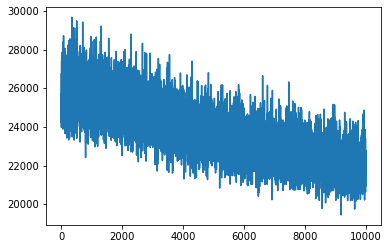

In [218]:
plt.plot(history.history['loss'])
plt.show()

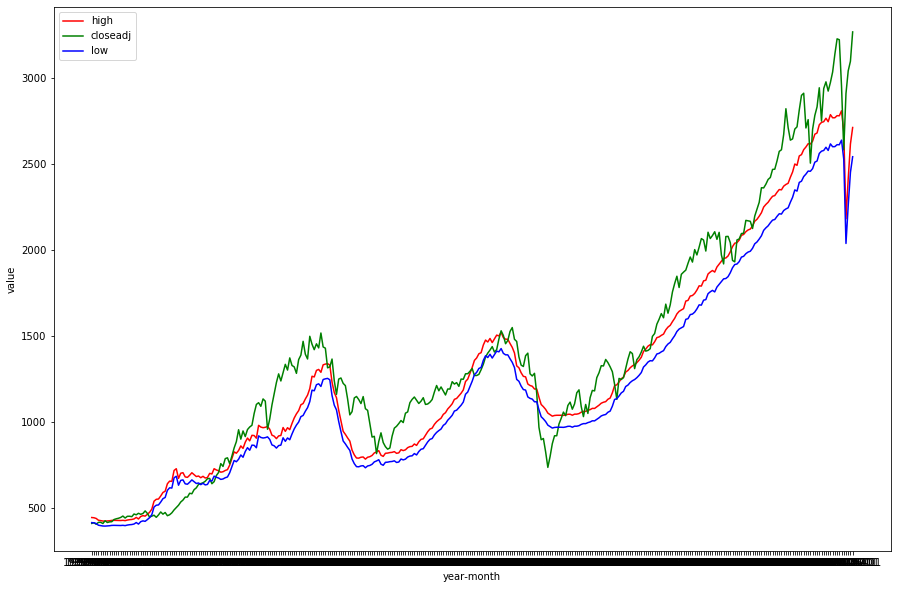

In [219]:
plt.figure(figsize=(15,10))
plt.plot(sp500_date, high_real_snp, 'r', label='high')
plt.plot(sp500_date, adjclose_real_snp, 'g', label='closeadj')
plt.plot(sp500_date, low_real_snp, 'b', label='low')
plt.xlabel('year-month')
plt.ylabel('value')
plt.legend()
plt.show()